<div style="background: #D5CFF9; padding: 10px; border: 0.5px #B0E0E6; border-radius: 10px;"> 
    
**Название проекта**
    
Изучение закономерностей, определяющих успешность игр
    
_____
    
    
**Описание исследования**
    
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
    
_____
    
    
**Цель исследования**
    
Провести анализ данных рынка компьютерных игр с целью выявления закономерностей, определяющих успешность игры, и, следовательно, помощи компании "Стримчик" с планированием бюджета на 2017 год
    
_____
**Исходные данные**
    
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

______
    

**Данное исследование разделим на несколько частей.**

**[Часть 1. Изучение общей информации:](#part1)**
* [1. Загрузка библиотек, изученеие файлов с данными, получение общей информации.](#part1.1)
* [2. Построение "ящиков с усами" и гистограмм по столбцам с числовыми данными.](#part1.2)
* [3. Построение столбиковых диаграмм по столбцам с категорийными данными.](#part1.3)

**[Часть 2. Подготовка данных:](#part2)**
* [1. Приведение столбцов к нижнему регистру, данных к нужным типам.](#part2.1)
* [2. Расчёт суммарных продаж по всем регионам.](#part2.2)
* [3. Обработка пропусков.](#part2.3)
    
**[Часть 3. EDA:](#part3)**
* [1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?.](#part3.1)
* [2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? Выбрать актуальный период для дальнейшего анализа.](#part3.2)
* [3. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.](#part3.3)
* [4. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.](#part3.4)
* [5. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.](#part3.5)
* [6. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?](#part3.6)
    
**[Часть 4. Составление портрета пользователей для каждого региона](#part4)**
    
**[Часть 5. Проверка гипотез:](#part5)**
* [1. Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".](#part5.1)
* [2. Проверка гипотезы "Средние пользовательские рейтинги жанров Action и Sports разные".](#part5.2)
    
**[Часть 6. Написание общего вывода](#part6)**
    
_________________
    
    
</div>


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify
from scipy import stats as st

pd.set_option('display.max_columns', 100)
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})

<a id='part1'></a>
## Часть 1. Изучение общей информации

<a id='part1.1'></a>
### 1. Загрузка библиотек, изученеие файлов с данными, получение общей информации.

In [30]:
# поместим датафрейм в переменную
df = pd.read_csv('games.csv')

In [31]:
# взглянем на различные стройки датафрейма
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10561,Monkey Island: Special Edition Collection,PS3,2011.0,Adventure,0.00,0.08,0.00,0.02,NaN,NaN,NaN
6781,Panzer General,PS,1995.0,Strategy,0.14,0.09,0.00,0.02,NaN,NaN,NaN
14101,Ultimate Game Room,DS,2009.0,Misc,0.03,0.00,0.00,0.00,NaN,tbd,E
12766,Rugby World Cup 2015,PS3,2015.0,Sports,0.00,0.05,0.00,0.01,NaN,tbd,E
6113,Divinity: Original Sin,PS4,2015.0,Role-Playing,0.10,0.12,0.02,0.04,NaN,NaN,NaN
6739,Major League Baseball 2K7,PS3,2007.0,Sports,0.23,0.00,0.00,0.02,74.0,4.7,E
5686,Dynasty Warriors 4 Empires,PS2,2004.0,Action,0.00,0.00,0.32,0.00,71.0,8.8,T
6380,The BIGS,X360,2007.0,Sports,0.18,0.08,0.00,0.00,79.0,8.4,E
8793,de Blob 2,X360,2011.0,Platform,0.10,0.04,0.00,0.01,77.0,7.5,E10+
5143,Skylanders: Trap Team,XOne,2014.0,Action,0.26,0.07,0.00,0.04,NaN,NaN,NaN


**Промежуточный вывод:**

Кажется, что с данными всё в порядке. Следовало бы привести названия столбцов к единому виду (lower), а также изменить тип данных столбца Year_of_Release с float на int, как и Critic_Score.

In [32]:
# взглянем на типы данных столбцов и количество пропусков по столбцам
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Промежуточный вывод:**

Много пропусков в столбцах Critic_Score, User_Score, Rating. Отсутствие оценок можно объяснить низкой популярностью игр, рейтинга - неактуальностью американского рейтинга для других стран.

In [33]:
# взглянем описательные статистик по числовым данным
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


**Промежуточный вывод:**

- Year_of_Release: первая игра датафрейма выпущена в 1980 году, последняя - в 2016.
- NA_sales: какая-то игра продалась тиражом в 41 млн.копий, невероятный результат и очень далёкий от среднего. Среднее сильно подвержено влиянию аномалий, потому что находится на уровне третьего квартиля. Аналогичная история с другими рынками.
- EU_sales: второй по величине рынок.
- JP_sales: третий по величине рынок.
- Other_sales: продажи по всему остальному миру меньше каждого отдельного взято рынка выше.
- Critic_Score: ни одна игра до сих пор не заслужила 100 баллов по мнению критиков. В среднем большинство игр получают около 70 баллов.

In [34]:
# взглянем на описательные статистики по категорийным данным
df.describe(include=['object'])

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


**Промежуточный вывод:**

- Name: уникальные значения - 11 из 16 тысяч. Объяснить это можно тем, что одна и та же игра выходит на разных платформах. Например, игра FIFA 16 будет указана в списке игр несколько раз, потому что выходит на платформах PS4, XOne, PC. Игра NFS: Most Wanted выпускалась на б*о*льшем количестве платформ.
- Platform: за 36 лет была разработана 31 уникальная платформа. Больше всего игр было выпущено на PS2.
- Genre: 12 уникальных жанров, самый популярный - Action.
- User_Score: из всех оценок приблизительно четверть приходится на tbd - to be determined - оценка, которая ещё не поставлена/не опубликована.
- Rating: около 40% игр имеют рейтинг "E" ("Everyone", для всех), что не удивительно - выгодно, если игра охватывает б*о*льшую аудиторию.

In [35]:
# посмотрим на количество дубликатов
df.duplicated().sum()

0

<a id='part1.2'></a>
### 2. Построение "ящиков с усами" и гистограмм по столбцам с числовыми данными.

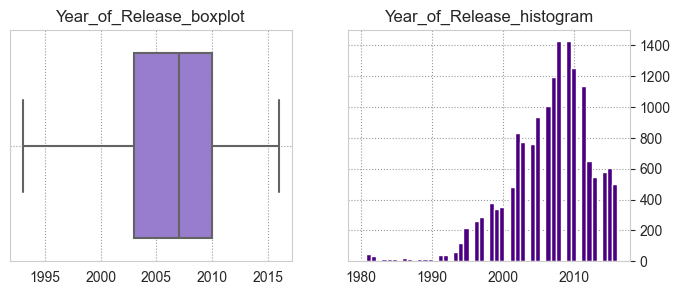

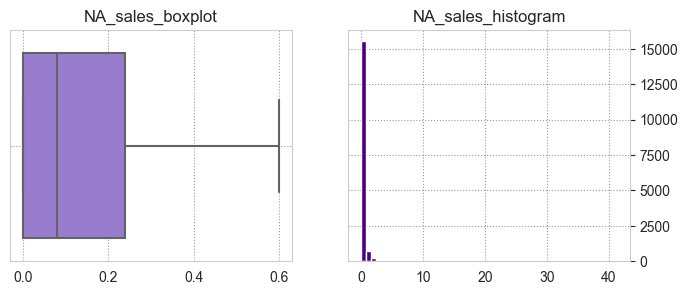

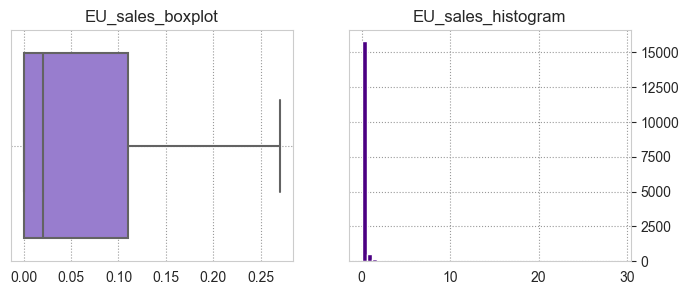

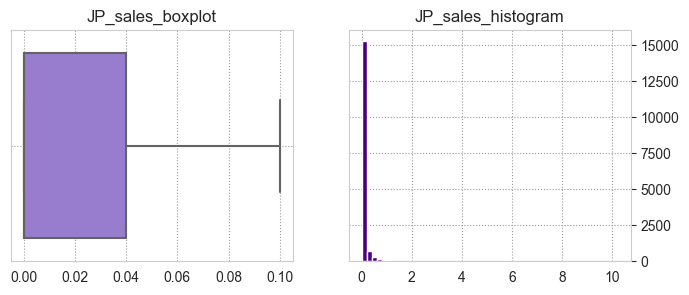

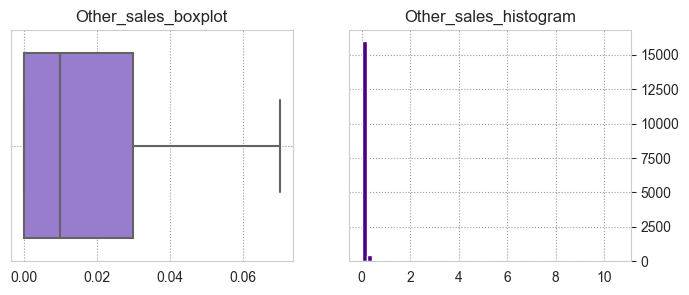

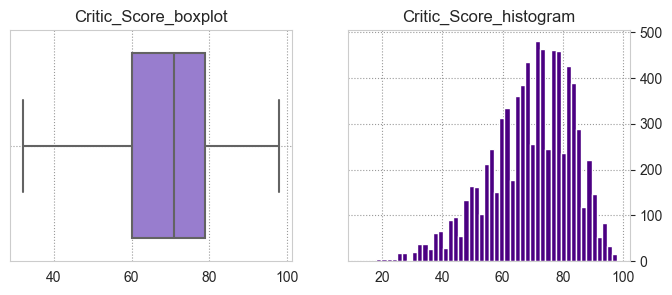

In [36]:
# так как гистограммы не всегда информативны, добавим к ним ящик с усами для каждого столбца

for i in df.select_dtypes(['int', 'float']).columns:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
    sns.boxplot(data=df, x=i, orient='h', color='mediumpurple', showfliers=False, ax=ax1).set(xlabel='')
    ax1.set_title(i + '_boxplot')
    ax1.grid(True)
    ax1.set_axisbelow(True)
    
    ax2.hist(df[i], bins=50, color='indigo')
    ax2.set_title(i + '_histogram')
    ax2.grid(True)
    ax2.yaxis.tick_right()
    ax2.set_axisbelow(True)
    
    plt.show()

<a id='part1.3'></a>
### 3. Построение столбиковых диаграмм по столбцам с категорийными данными.

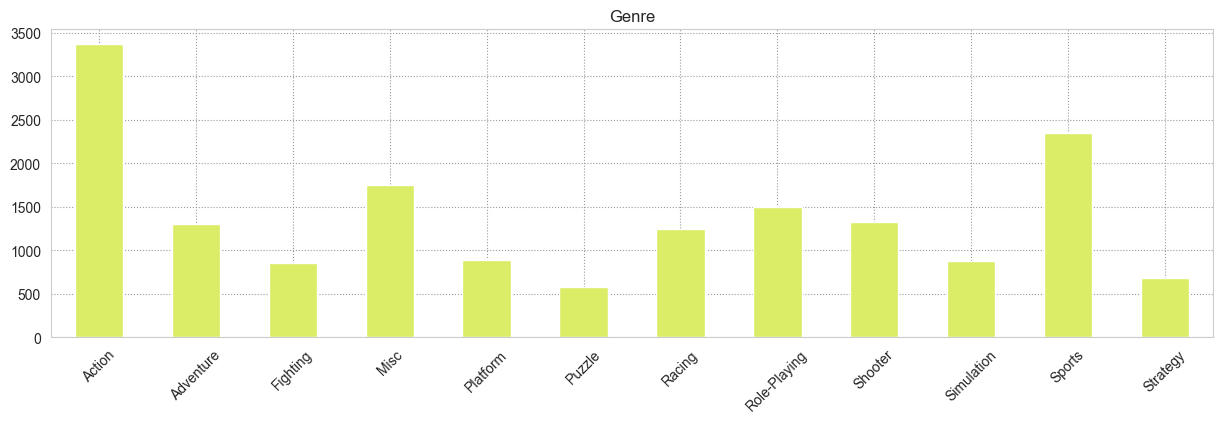

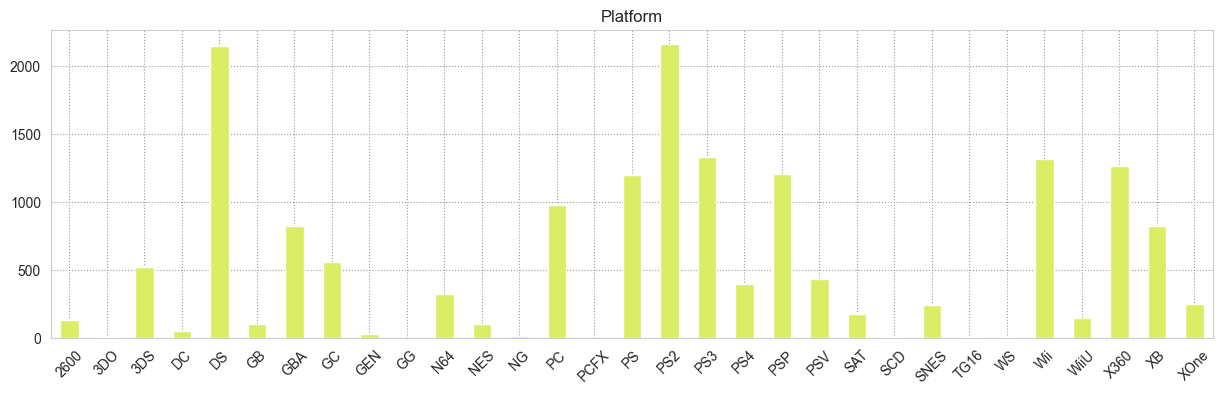

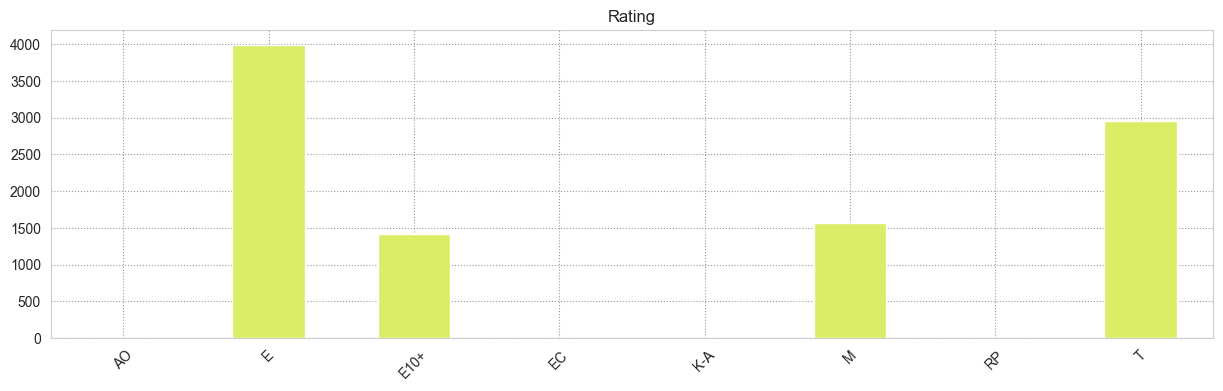

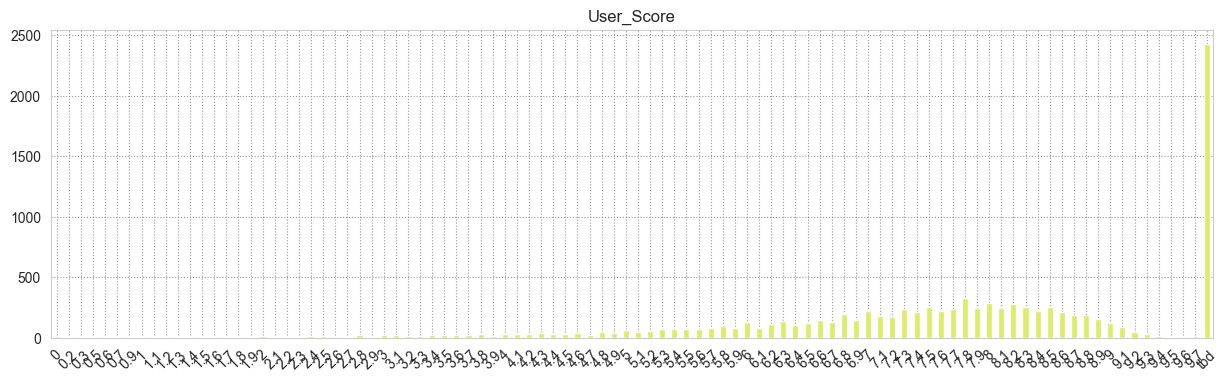

In [37]:
# сравним кол-во категориальных данных по столбцам

for i in df.select_dtypes('object').columns.difference(['Name']):
    ax = (df
          .groupby(i)
          .agg({i: 'count'})
          .plot.bar(figsize=(15, 4), legend=False, \
                    color=sns.color_palette('summer_r')).set(xlabel='')
         )
    plt.title(i)
    plt.xticks(rotation=45)

**Вывод:**
- у двух игр нет названия. Вероятно, техническая ошибка, однако кол-во слишком маленькое, поэтому, возможно, сообщением о ней можно пренебречь. Позже можно проверить эти строки, есть ли важная для исследования информация по ним. Если нет, то избавимся.
- платформа по каждой строчке датафрейма указана, несколько видов платформ начиная от популярных PlayStation и Xbox, заканчивая теми, о которых лично я даже не слышал (GB, DS, XB);
- у некоторых игр нет информации о годе выхода, но их пренебрежительно мало. Много игр вышли в промежутке между 2007 и 2010 годом, о чём свидетельствует медиана и её скос в правую сторону. Год выпуска игр с 1980 по 2016. Тип данных float, следует перевести в int;
- всего 12 уникальных жанров игр, самый популярный - Action, на втором месте - Sports, на третьем - Misc (Miscellaneous game - игры, не вошедшие в классификацию);
- в основном продажи на всех рынках составляют до 600000 копий, по объёму ранжируется в следующем порядке: США, Европа, Япония и остальные рынки.
- критики ставят целые оценки, хотя тип данных столбца - float, следует также перевести в int. Половина игр не имеет оценки критиков, как вариант, можно сгруппировать данные по платформе и жанру, найти медианное значение оценки критиков такой группы и заменить им все пропущенные значения при аналогичной группировке. Это кажется неплохой идеей, потому что, скорее всего, оценки не стоят у непопулярных средненьких игр, поэтому мало страшного, если заметить отсутствующие значения медианными. 100 баллов не получила ни одна игра, в среднем игры получают около 70 баллов.
- user_score имеет тип данных object, вероятно, из-за того, что около 2500 оценок имеют аббревиатуру tbd - to be determined. Предполагаю, что такие оценки даются играм, вокруг которых есть подозрительная активность, например, шквал очень низких оценок (0) или наборот высоких (10). Модерация проверяет, насколько эти оценки выставляются реальными людьми, насколько они объективны, поэтому временно присуждает игре рейтинг tbd. Либо на сайте, где выставляются эти оценки, общий оценочный вердикт игре выносится только тогда, когда она набирает определённое кол-во оценок, например, от 50. Tbd означает, что у данной игры ещё нет 50 оценок, например, из-за её непопулярности. Для маленьких инди-проектов это типичная ситуация.
- ESRB - ассоциация, за участие в которой нужно платить деньги. Этим можно объяснить отсутствие рейтинга у большого кол-ва игр, например, создание инди игр доступна небольшим разработчикам, т.к. на них требуется мало денег. Чтобы сэкономить ещё больше, определённые игры могут не проходить сертификацию. Кроме того, сертификацией обычно занимается издатель, а у большинства небольших проектов издателя нет. Кроме того, ESRB - это американская контора, и если рейтинг не указан, вполне возможно, что игра просто не продаётся в США.
- явных дубликатов нет.

<a id='part2'></a>
## Шаг 2. Подготовьте данные

<a id='part2.1'></a>
### 1. Приведение столбцов к нижнему регистру.

In [38]:
# приведём названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

# данные в столбцах year_of_release и critic_score целочисленные,
# следовательно, переведём их в тип данных int
data_type_to_change = ['year_of_release', 'critic_score']
for col in data_type_to_change:
    df[col] = df[col].astype('int32', errors='ignore')
    
# остальные столбцы с типом данных float64 переведём в float32
# для экономии памяти
for col in df.select_dtypes('float').columns:
    df[col] = df[col].astype('float32')

<a id='part2.2'></a>
### 2. Расчёт суммарных продаж по всем регионам.

In [39]:
# добавим столбец с суммарными продажами во всех регионах
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

<a id='part2.3'></a>
### 3. Обработка пропусков.

In [40]:
# рассмотрим пропуски в имеющихся столбцах и подумаем, что с ними делать
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


Взять откуда-то название игр не представляется возможным, однако есть данные по продажам, году выпуска и платформе. На случай, если потребуется суммировать продажи, например, на рынке США по платформам, продажи в 1.78 млн копий не кажутся слишком маленькими. Раз так, то избавялться от этих строк из-за отсутствия названия игры не следует.

В столбце year_of_release данные отсутствуют в приблизительно 300 строках. Вручную искать игры и добавлять год их выпуска довольно долго, и удалять эти строки из-за отстутствующего года выпуска не совсем корректно. Оставим как есть.

Отсутствующие значения в critic_score можно объяснить тем, что малопопулярные игры не оцениваются критиками, потому что имеют небольшой бюджет, следовательно, до них не доходит внимание не то что критиков, но и игроков, продаются они совсем скромным количеством копий. Сомневаюсь, что есть смысл заполнять пропущенные значения.

In [41]:
# Что касается user_score, можно предположить, что tbd присуждается играм, 
# которые ещё не получили достаточное количество оценок пользователей, по 
# которым рассчитывается среднее, чтобы вывести одну общую оценку. Как 
# вариант, tbd можно заменить на nan и перевести тип данных столбца в float.
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

# изменим тип данных столбца user_score на float
df['user_score'] = df['user_score'].astype('float32')

In [42]:
# найдём дубликаты по столбца 'name' и 'platform', отобразим и 
# первое появление игры, и её дубликат
df.loc[df.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+,1.17
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,0.48
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01


**Промежуточный вывод:**

Обсудим каждый дубликат:
- Madden NFL 13: игры различаются только по продажам, в остальном - явные дубликаты. Вероятно, дубликат появился в результате технической ошибки. Что с этим можно сделать: сложить продажи и оставить вариант под индексом 604; пренебречь небольшим количеством продаж по индексу 16230 и не прибавлять их к основным продажам; ничего не выбирать, так как позже в иследовании годы до 2015 будут отсеяны.
- NaN: подозрительно похожий на предыдущий случай, однако в данном случае не можем судить, что игры под индексами 659 и 14244 - одинаковые. Игра 93 года, в анализ актуальных данных не войдёт.
- Need for Speed Most Wanted: на лицо какая-то ошибка в данных, потому что это не дубликат, а две разные игры. В 2005 году вышла оригинальная игра, в 2012 - сиквел от другого разработчика, который должен иметь в конце названия дополнение "a Criterion Game", указывающее на разработчика и, таким образом, отличающее от оригинальной игры. Однако, несмотря на то, что игры разные, у них указан одинаковый и critic_score, и user_score, и rating по обеим платформам. Суть в том, что на большинстве сайтов, где публикуются оценки и обзоры критиков и пользователей, например, metacritic.com, на одну и ту же игру для разных платформ разные оценки. Это и закономерно, ведь и ЦА разная. Однако здесь всё одинаково. Это наводит на мысль о не качественных данных. Так как игры разные, за дубликаты они не считаются.
- Sonic the Hedgehog: неизвестно, одинаковые ли это игры, потому что у дубликата не указан год, хотя critic_score, user_score и rating одинаковые, тем не менее, как выяснилось из предыдущего примера, из-за ошибки в данных разные игры могут иметь полностью идентичные оценки критиков, пользователей, и рейтинг. В актуальные данные не входят, поэтому ничего с ними делать не будем. 

В столбце rating, как и писалось уже выше, игры без рейтинга, вероятно, не выходили в штатах, следовательно, получать рейтинг в ESRB не имело смысла. Заменять такие данные каким-то значениями считаю некорректным. Если таки заменять, то можно попробовать сгруппировать данные по жанру и рейтингу, подсчитать кол-во самого популярного рейтинга в каждом жанре и заменить им пустые значения в рейтинге.

<a id='part3'></a>
## Часть 3. EDA

<a id='part3.1'></a>
### 1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

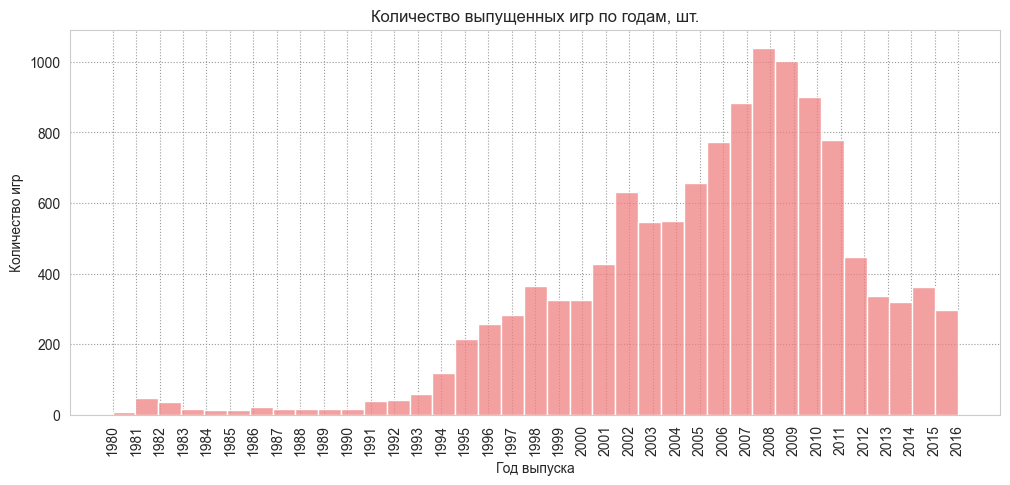

In [43]:
# посмотрим, сколько игр выпускалось в разные годы
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))
ax = sns.histplot(data=df.drop_duplicates(subset=['name', 'year_of_release'], keep='first'), 
                  x='year_of_release', bins=df['year_of_release'].nunique(), color='lightcoral')
ax.set_title('Количество выпущенных игр по годам, шт.')
ax.grid(True)
ax.set_axisbelow(True)
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество игр')
plt.xticks(sorted(df['year_of_release'].dropna().unique()), rotation=90)
plt.show()

**Промежуточный вывод:** До 2000 года продавалось значительно меньше игр, чем после. Кроме того, например, графическая составляющая в эти годы разительно отличалась от современных игр, популярные платформы уже совсем другие. Кроме того, на фоне современных игр, игры до приблизительно 2007 года я счёл бы устаревшими, как и платформы, на которых они выпускались, следовательно, отсечём игры до 2007 года выпуска.



In [44]:
df = df.query('year_of_release > 2006')

<a id='part3.2'></a>
### 2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

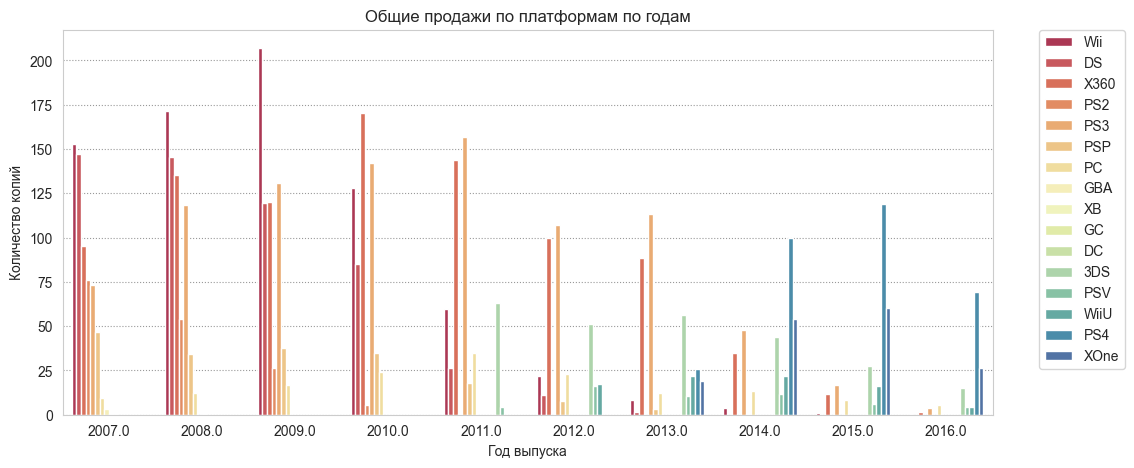

In [45]:
# посмотрим на общее кол-во продаж по платформам в каждый из оставшихся лет
sales_by_platforms = (df
 .groupby(['year_of_release', 'platform'])
 .agg({'total_sales': 'sum'})
 .sort_values(by=['year_of_release', 'total_sales'], ascending=[True, False])
 .reset_index()
)

# для сравнения категориальных значений построим столбиковую диаграмму
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))

ax = sns.barplot(data=sales_by_platforms, x='year_of_release', y='total_sales', \
                 hue='platform', palette='Spectral')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.set_title('Общие продажи по платформам по годам')
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество копий')

plt.show()

**Промежуточный вывод:** как и говорилось в предыдущем выводе, даже за промежуток в 9 лет одни платформы безнадёжно устарели и были заменены другими. Невозможно планировать компанию на 2017 год по годам, в которых использовались платформы, которые не используются сейчас, следовательно, годы с большим количеством продаж по платформам Wii, DS, X360, PS2, PS3 и PSP считать не будем, то есть за актуальные данные возьмём годы с 2014 по 2016. 

In [46]:
df = df.query('year_of_release > 2013')

<a id='part3.3'></a>
### 3. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

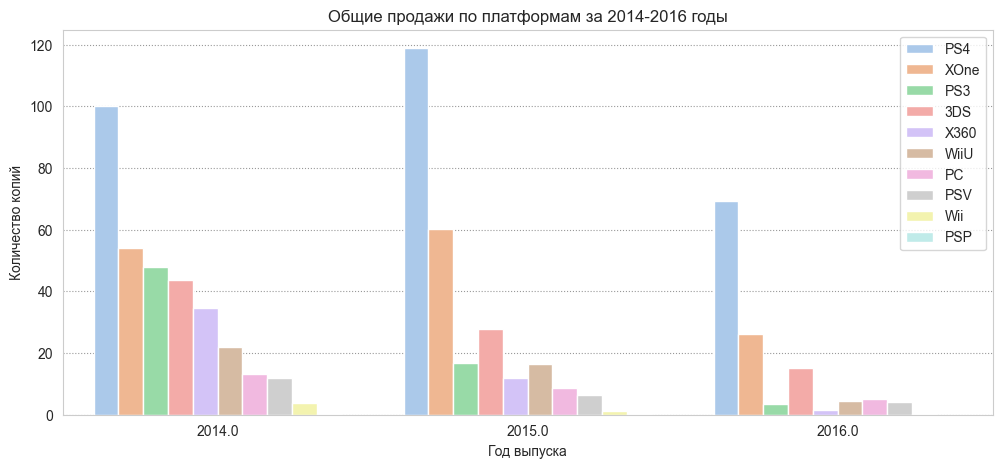

In [47]:
# построим столбикову диаграмму по актуальным годам и выберем подходящие платформы
sales_by_platforms = (df
 .groupby(['year_of_release', 'platform'])
 .agg({'total_sales': 'sum'})
 .sort_values(by=['year_of_release', 'total_sales'], ascending=[True, False])
 .reset_index()
)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))

ax = sns.barplot(data=sales_by_platforms, x='year_of_release', y='total_sales', hue='platform', palette='pastel')
plt.legend(loc='upper right')
ax.set_title('Общие продажи по платформам за 2014-2016 годы')
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество копий')

plt.show()

**Промежуточный вывод:** интересно, что предыдущие годы было видно, как популярность одних платформ падает на фоне появление других, например, когда PS2 заменялась PS3. С 15 по 16 год такой платформы не появилось. Прокомментируем каждую платформу и выберем несколько потенциально прибыльных:
- PS4: популярность различных приставок сильно зависит от качества релизов, которые там есть. Например, видимо, приблизительно в 2013 году приставка вышла, но на неё ещё не было игр. К 2015 году появились интересные релизы, ради которых люди были готовы купить приставку. Так как сами создатели PlayStation заинтересованы в продаже своей приставки, они же занимаются и разработкой качественных игр, то есть данная платформа скорее всего ещё несколько лет будет актуальна, и даже если ровно в 2017 году выйдет PS5, потрубется ещё пару лет для завершения разработки игр под неё, а PS4 всё ещё будет актуальна. Кроме того, чтобы между платформами был более мягкий переход и разработчики смогли больше заработать на продажах не только для новых платформ, игры либо изначально разрабатывают и для платформы старого поколения, и для платформы нового поколения, либо игры создаются с функцией обратной совместимости - игра работает на обеих платформах, что является ещё одним фактом в пользу выбора PS4 как потенциально прибыльной.
- XOne: аналогичная история, что и с PS4, только поколения Xbox меняются ещё реже. Это главный конкурент PS4, владелец которого - Microsoft, который планирует покупать небольших разработчиков и расширять пул игр для XOne, следовательно, платформу можно считать потенциально прибыльной.
- PS3: приставка, которую и по графику, и в произаичной реальности ждёт смерть. Она уже слишком старая, чтобы делать для неё игры с обратной совместимостью, не актуальна для новых, и несмотря на ещё имеющиеся продажи в 16 году, я склонен думать, что в 17 и позже она будет не актуальна. Тоже самое касается Xbox 360, PSP, Wii.
- 3DS: все поколения семейства Nintendo DS имеют обратную совместимость. Это значит, что у данной приставки большой пул игр, кроме того, если выйдет новое поколение, игры для старого будут всё равно актуальны. Вдобавок, данная приставка портативная и значительно более дешёвая на фоне PS4 и XOne, разработка игр для неё намного дешевле. Если выйдет игра, которая "выстрелит", она обеспечит популярность данной платформы и её следующего поколения на какое-то время, решиться на покупку данной приставки, стоимостью около 5000 рублей, проще, чем на покупку PS4 или Xbox One, стоимостью 25-35 тыс.руб. Продажи игр для данной платформы считаю потенциально прибыльными.
- WiiU: платформа доживает свои последние годы. Возможно, небольшую долю продаж только в 2017 году с неё можно сделать. Будем считать потенциально прибыльной.
- PC: персональный компьютер всегда будет иметь свою нишу благодаря тому, что именно на этой платформе лучшая графика и самый высокий показатель fps (частота кадров в играх. Чем выше fps, тем более плавная картинка. Для сравнения, на сопоставляемых с ПК PS4 и XOne максимальный fps в большинстве игр равен 30, на ПК - 60 и больше). Ещё по предыдущему графику за 2007-2016 год можно заметить, что одни приставки сменялись другими, но игры на PC всегда оставались примерно на одном уровне популярности и продолжают быть. Будем считать потенциально прибыльной платформой.
- PSV: PS Vita - один из главных конкурентов Nintendo DS и наследник PSP. Имеет почти те же преимущества, что и Nintendo DS. По сравнению с другими приставками, популярность PSV снижается относительно медленно. Как минимум в 2017 году ещё может принести продажи. Будем считать потенциально прибыльной.

Итого, в список потенциально прибыльных платформах войдут PS4, XOne, 3DS, WiiU, PC, PSV.

<a id='part3.4'></a>
### 4. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [48]:
# построив первый вариант boxplot'а по глобальным продажам игр по платформам,
# заметил, что распределение продаж по некоторым платформам сложно назвать
# актуальными. Например, из распределения по PS3 и Wii можно было бы подумать,
# что они являются потенциально прибыльными и учесть их при прогнозном расчёте
# для 2017 года, однако их потенциальная прибыльность лжива, так как основыывается
# существенно на результатах 2014 года. С тех пор популярность этих платформ 
# значительно снизилась и я принял решение продолжить анализ на основе только 
# 2015 и 2016 года. Эти годы лучше отражают актуальное состояние рынка.

df = df.query('year_of_release > 2014')

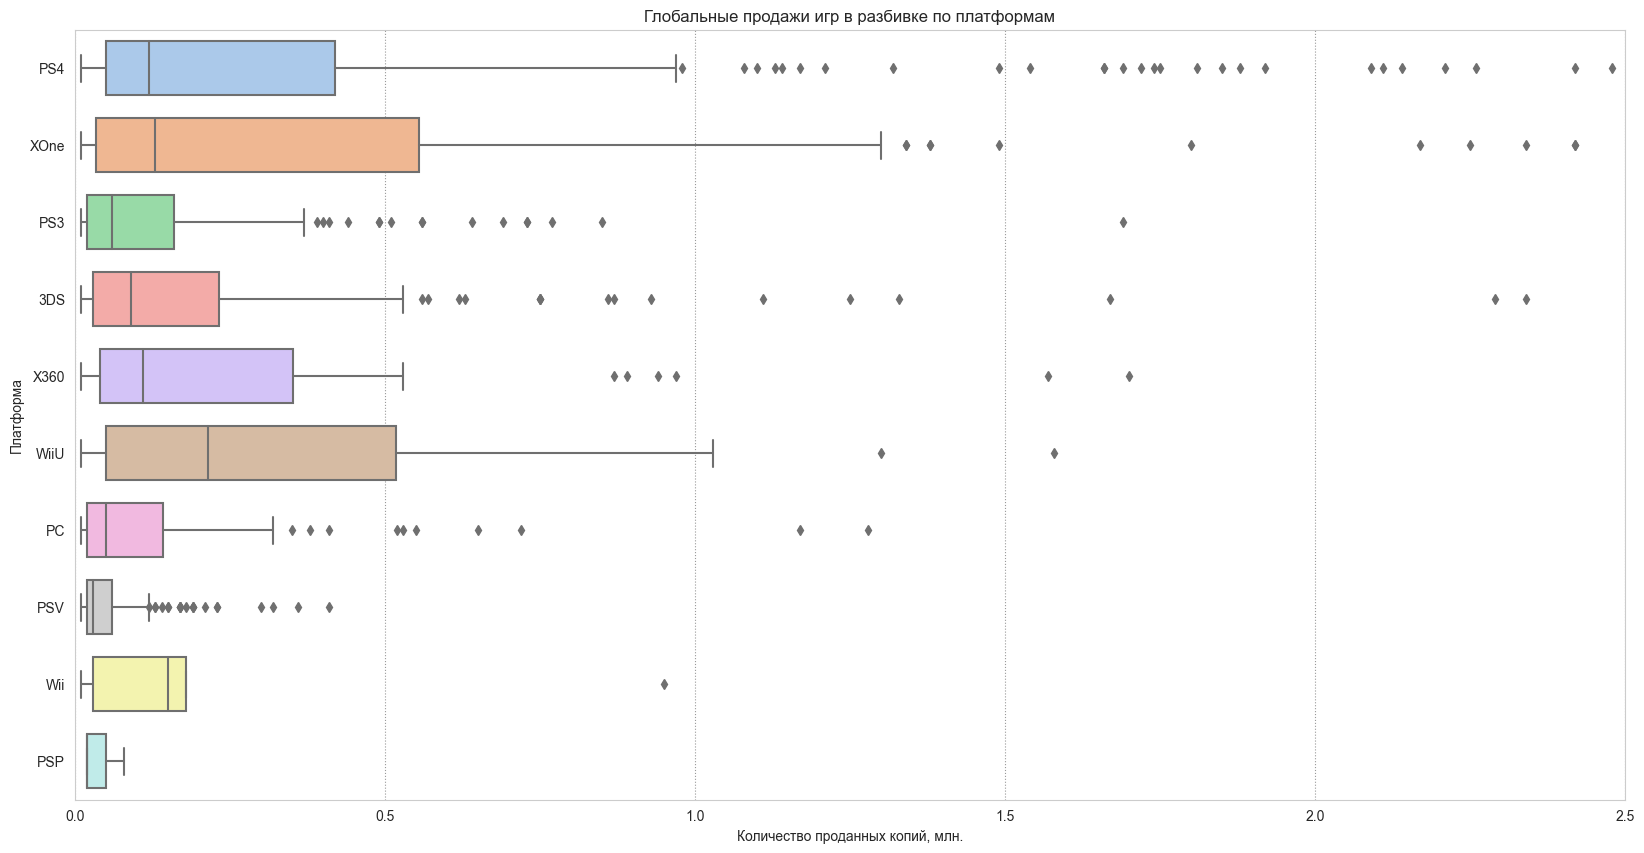

In [49]:
# построим boxplot по глобальным продажам игр по платформам
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

sns.boxplot(data=df, y='platform', x='total_sales', palette='pastel', width=0.7, \
            order=['PS4', 'XOne', 'PS3', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP'])
ax.set_title('Глобальные продажи игр в разбивке по платформам')
ax.set_xlabel('Количество проданных копий, млн.')
ax.set_ylabel('Платформа')
plt.xlim(0, 2.5)

plt.show()

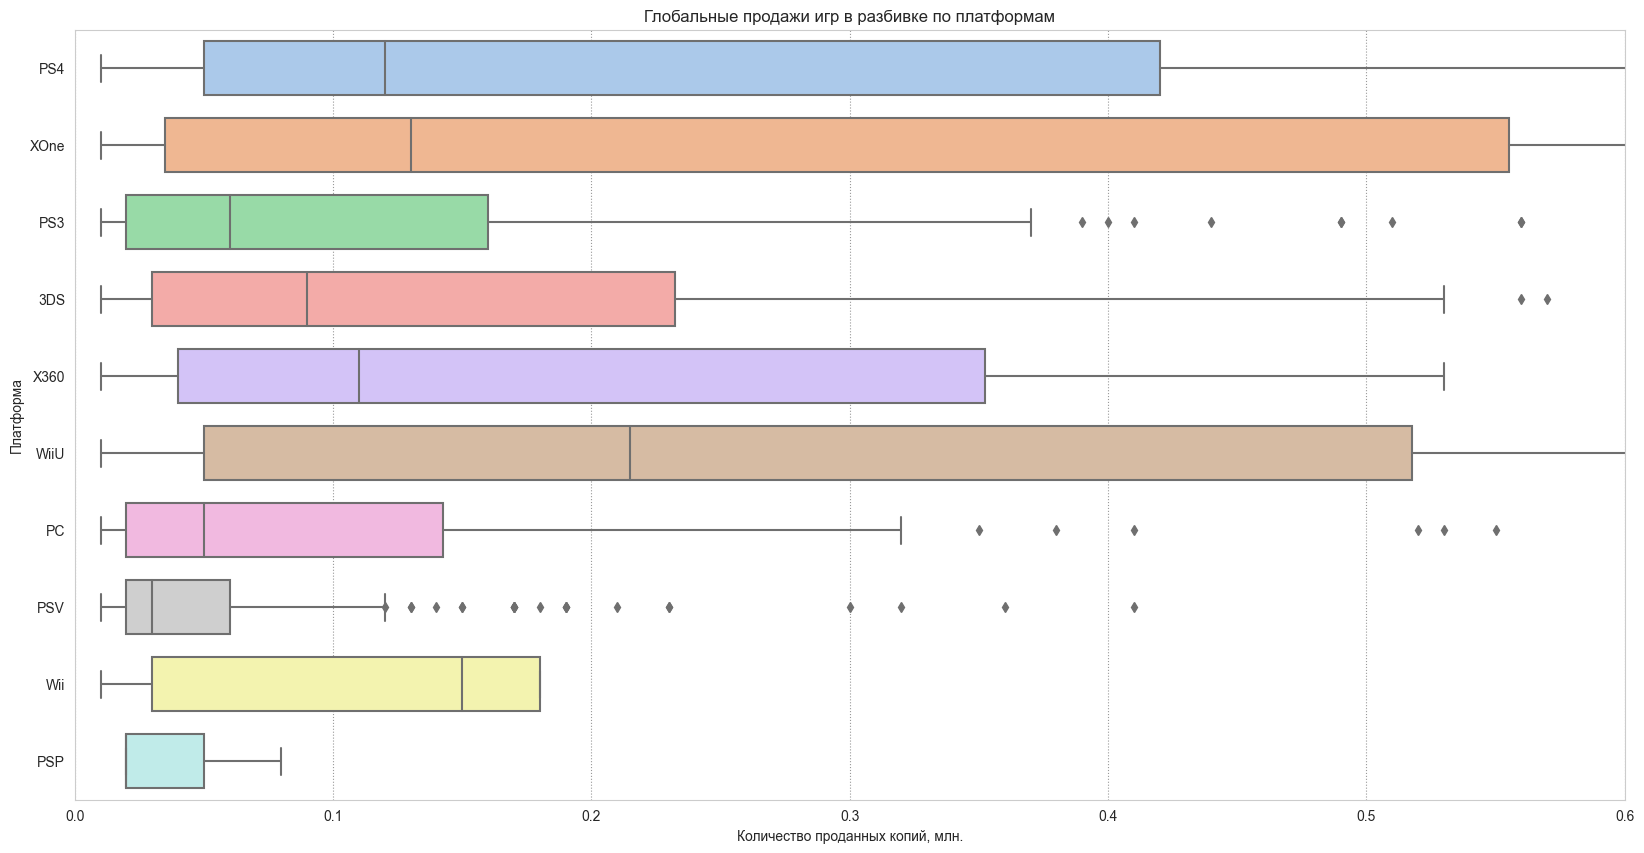

In [50]:
# на предыдущем графике невозможно сравнить квартили, поэтому составим ещё один,
# где аномалии оказывают меньшее влияние на размер графика
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))

sns.boxplot(data=df, y='platform', x='total_sales', palette='pastel', width=0.7, \
            order=['PS4', 'XOne', 'PS3', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP'])
ax.set_title('Глобальные продажи игр в разбивке по платформам')
ax.set_xlabel('Количество проданных копий, млн.')
ax.set_ylabel('Платформа')
plt.xlim(0, 0.6)

plt.show()

**Промежуточный вывод:** 

- у PS4, XOne и WiiU большой потенциал. Несмотря на то, что в основном игры на этих платформах продаются меньше чем по 250 тыс.копий, крайняя возможная планка продаж 1-1.25 млн.копий. 
- X360, несмотря на уже вышедшую консоль нового поколения, XOne, имеет всё ещё неплохие продажи. Объяснить это можно следующими причинами:
  1. Различие по характеристикам между новым и старым поколением консолей не столь велико, надобность в переходе на новое поколение не существенна.
  2. Новое поколение XOne вышло относительно недавно и владельцы старых поколений ещё не успели перейти на новое.
  3. Новые поколения Xbox выходят реже, следовательно, разработчики заботятся о наличии обратной совместимости для X360.
- Nintendo 3DS имеет неплохой потенциал вплоть до полмиллиона продаж, что является неплохим показателем для консоли с низкой себестоимостью разработки приставки и игр.
- PC имеет довольно скромные показатели, хотя присутствуют аномалии, когда игры продавались по более чем миллиону копий. Медианные продажи на PC хуже, чем у Wii, однако у PC гораздо лучше потенциал - 3-й квартиль находится за 300 тысячами копий.
- PSV в сравнении с Nintendo 3DS имеет совсем небольшие продажи даже с учётом аномальных, что сомнительно сказывается на потенциальной прибыльности игр данной платформы.
- Неплохие показателии Wii объясняются хорошими продажами в 2015 году, но можно было заметить нисходящий тренд ещё на предыдущих графиках. Предположу, что если не брать во внимание 2015 год, результаты будут на уровне PSV.
- Несмотря на мои негативные прогнозы по поводу ближайшей судьбы PS3, она всё ещё показывает хорошие продажи и потенциал, лучше, чем у излюбленного PC. Вероятно, PS3 всё-таки следует учесть при составлении списка потенциально прибыльных платформ и продавать небольшую долю от общих планируемых продаж магазина в 2017 году.

<a id='part3.5'></a>
### 5. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

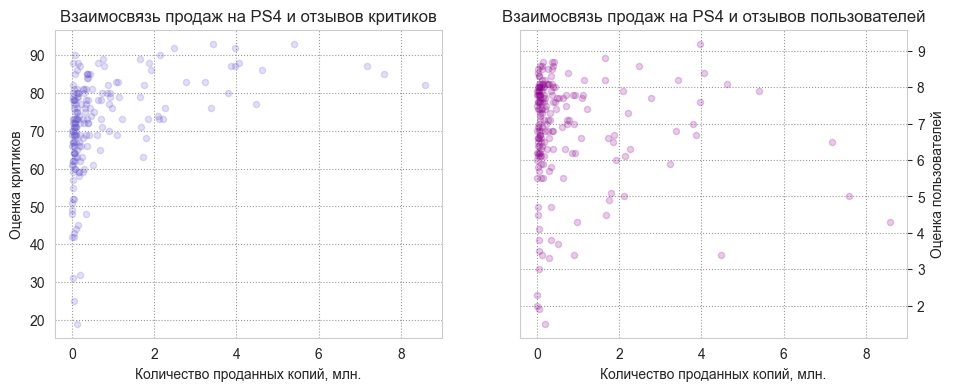

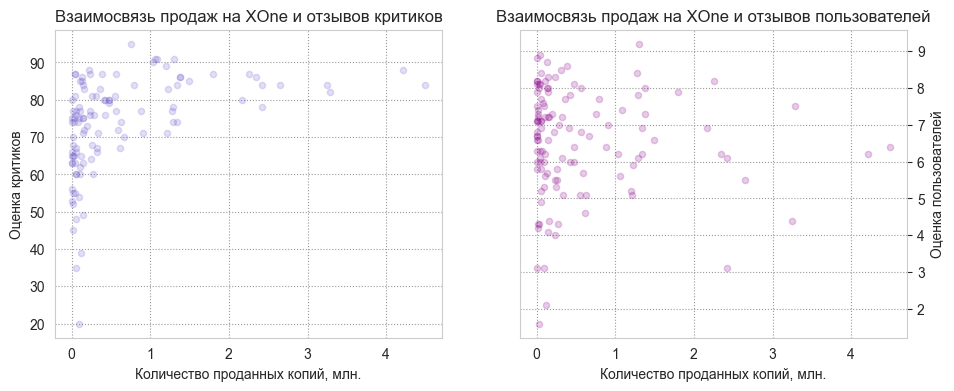

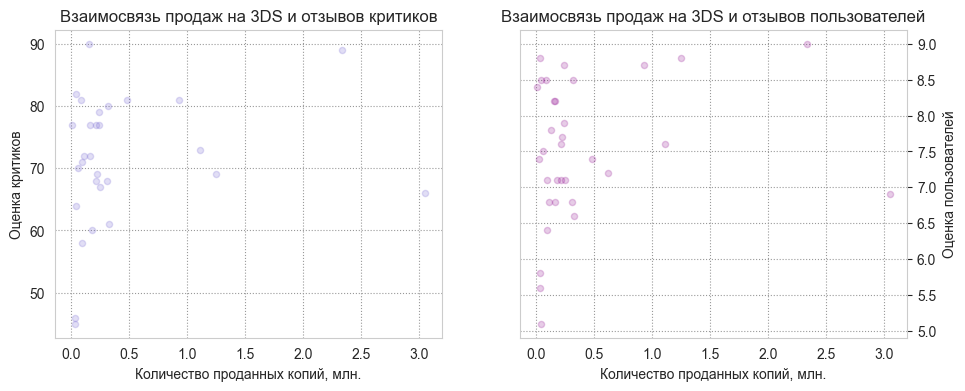

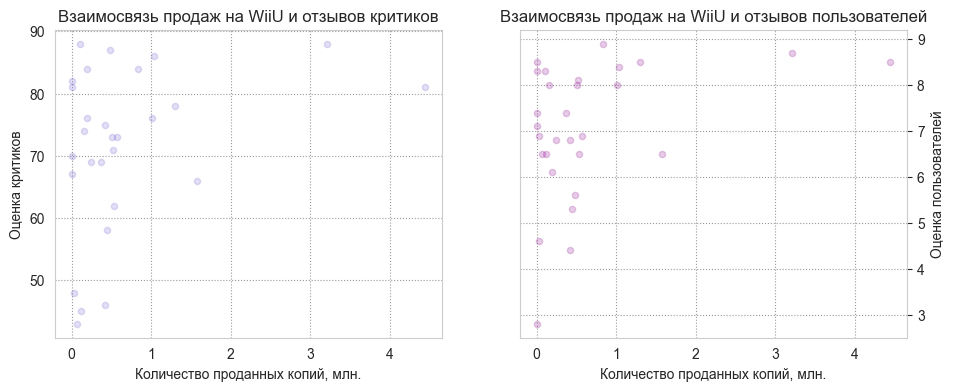

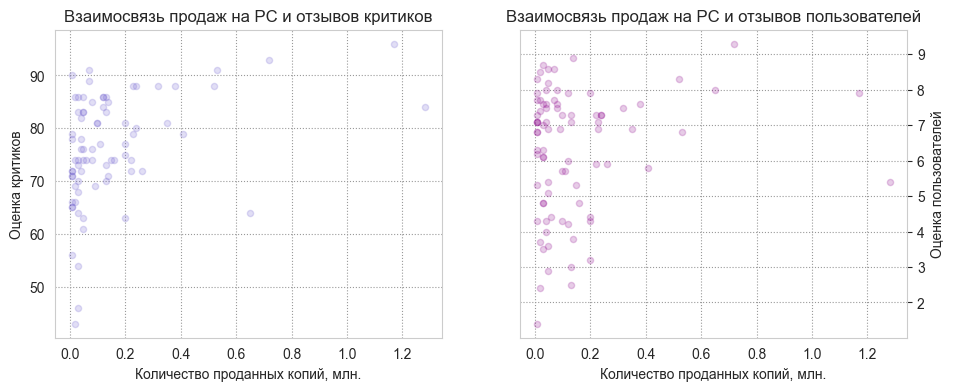

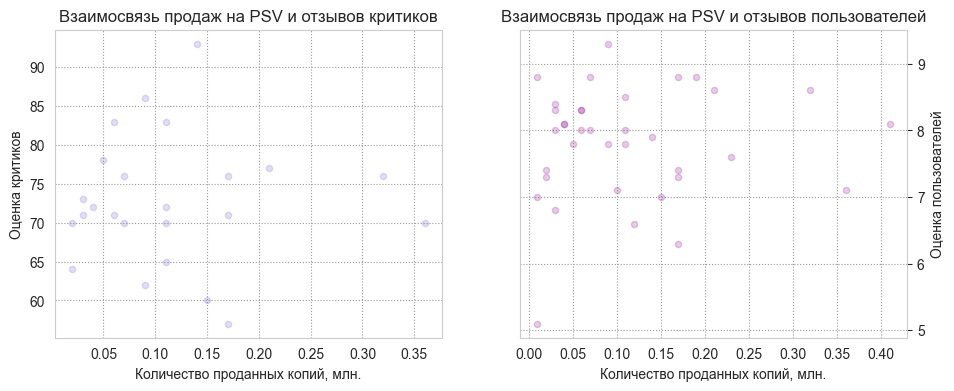

In [51]:
# создадим список платформ популярных платформ, по которым поставлено
# больше всего пользовательских оценок и оценок критиков
platforms = ['PS4', 'XOne', '3DS', 'WiiU', 'PC', 'PSV']

# построим диаграмму рассеяния по парам total_sales-critic_score
# и total_sales-user_score
for plat in platforms:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
    ax1 = (df
           .query(f'platform == "{plat}"')
           .plot(x='total_sales', y='critic_score', \
                 kind='scatter', grid=True, alpha=0.2, \
                 figsize=(11, 4), color='slateblue', ax=ax1)
          )
    ax1.set_title(f'Взаимосвязь продаж на {plat} и отзывов критиков')
    ax1.set_xlabel('Количество проданных копий, млн.')
    ax1.set_ylabel('Оценка критиков')
    
    ax2 = (df
           .query(f'platform == "{plat}"')
           .plot(x='total_sales', y='user_score', \
                 kind='scatter', grid=True, alpha=0.2, \
                 figsize=(11, 4), color='darkmagenta', ax=ax2)
          )
    ax2.set_title(f'Взаимосвязь продаж на {plat} и отзывов пользователей')
    ax2.set_xlabel('Количество проданных копий, млн.')
    ax2.set_ylabel('Оценка пользователей')
    ax2.yaxis.set_label_position('right')
    ax2.yaxis.tick_right()
    

In [52]:
# посчитаем коэффициент корреляции Пирсона между 
# оценками критиков и пользователей и количеством продаж
platforms = ['PS4', 'XOne', '3DS', 'WiiU', 'PC', 'PSV']

for plat in platforms:
    print(f'Корреляция Пирсона по платформе {plat}')
    display(df.query(f'platform == "{plat}"').loc[:,['total_sales', 'critic_score', 'user_score']].corr())
    print()

Корреляция Пирсона по платформе PS4


,total_sales,critic_score,user_score
total_sales,1.000000,0.392849,-0.059738
critic_score,0.392849,1.000000,0.533330
user_score,-0.059738,0.533330,1.000000



Корреляция Пирсона по платформе XOne


,total_sales,critic_score,user_score
total_sales,1.000000,0.430889,-0.041467
critic_score,0.430889,1.000000,0.459443
user_score,-0.041467,0.459443,1.000000



Корреляция Пирсона по платформе 3DS


,total_sales,critic_score,user_score
total_sales,1.000000,0.177575,0.198796
critic_score,0.177575,1.000000,0.791853
user_score,0.198796,0.791853,1.000000



Корреляция Пирсона по платформе WiiU


,total_sales,critic_score,user_score
total_sales,1.000000,0.317046,0.363519
critic_score,0.317046,1.000000,0.678858
user_score,0.363519,0.678858,1.000000



Корреляция Пирсона по платформе PC


,total_sales,critic_score,user_score
total_sales,1.000000,0.377332,0.150381
critic_score,0.377332,1.000000,0.482804
user_score,0.150381,0.482804,1.000000



Корреляция Пирсона по платформе PSV


,total_sales,critic_score,user_score
total_sales,1.000000,0.003604,0.078335
critic_score,0.003604,1.000000,0.454487
user_score,0.078335,0.454487,1.000000


**Промежуточный вывод:** Оценки критиков и пользователей имеют слабую положительную корреляцию, иными словами, есть игры с высокими оценками и высокими продажами, так и достаточно обратных примеров - низкими/средними оценками и всё ещё высокими продажами. Много игр с высокими оценками и низкими продажами.

<a id='part3.6'></a>
### 6. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

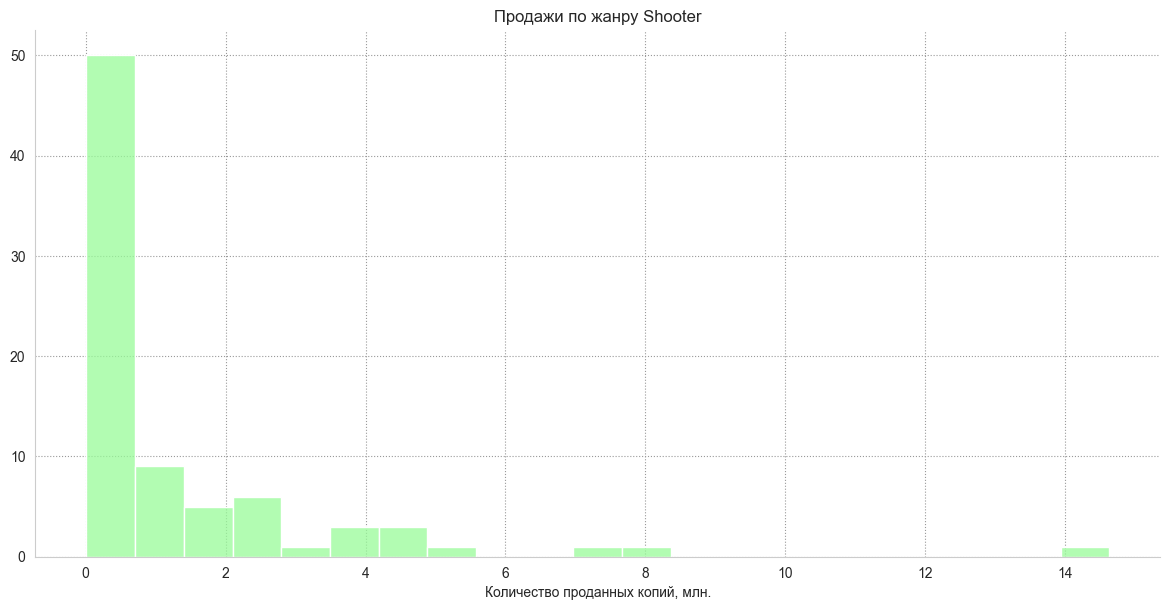

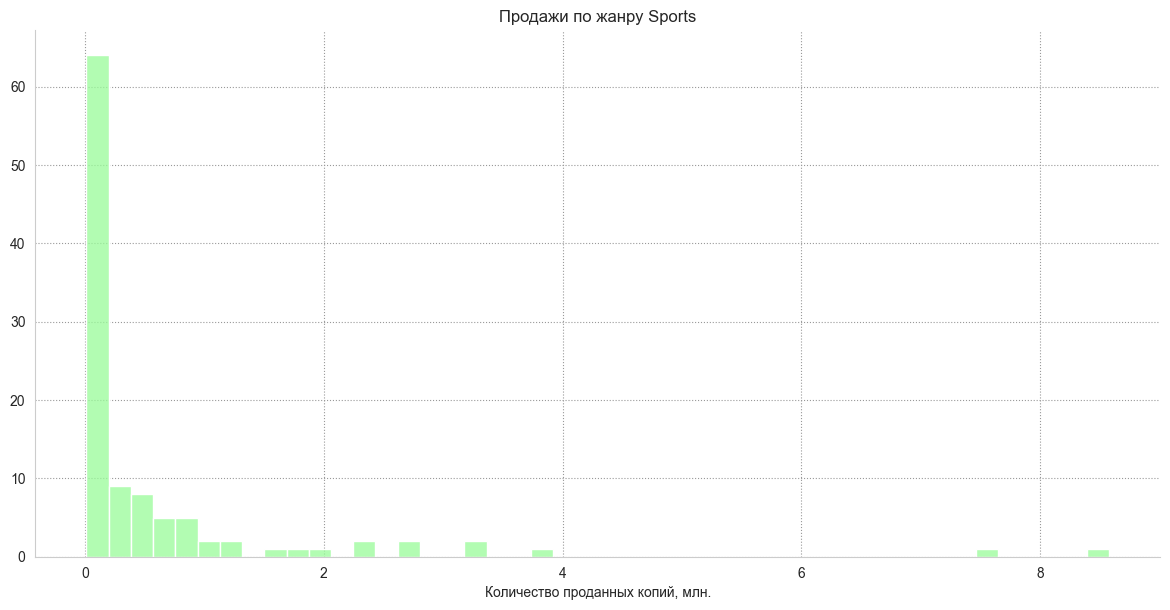

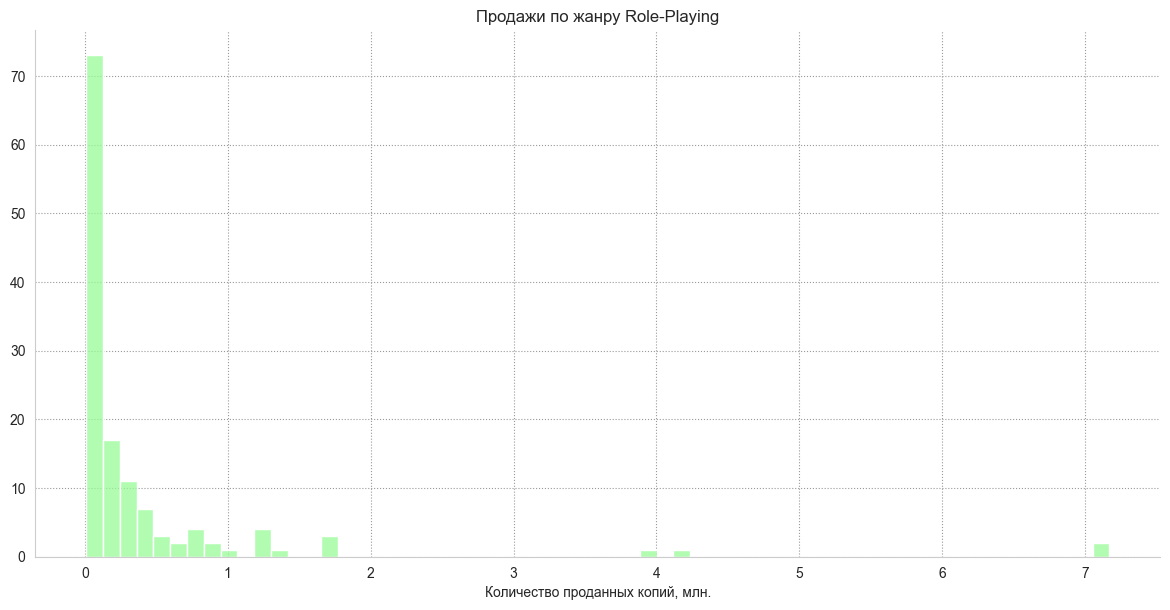

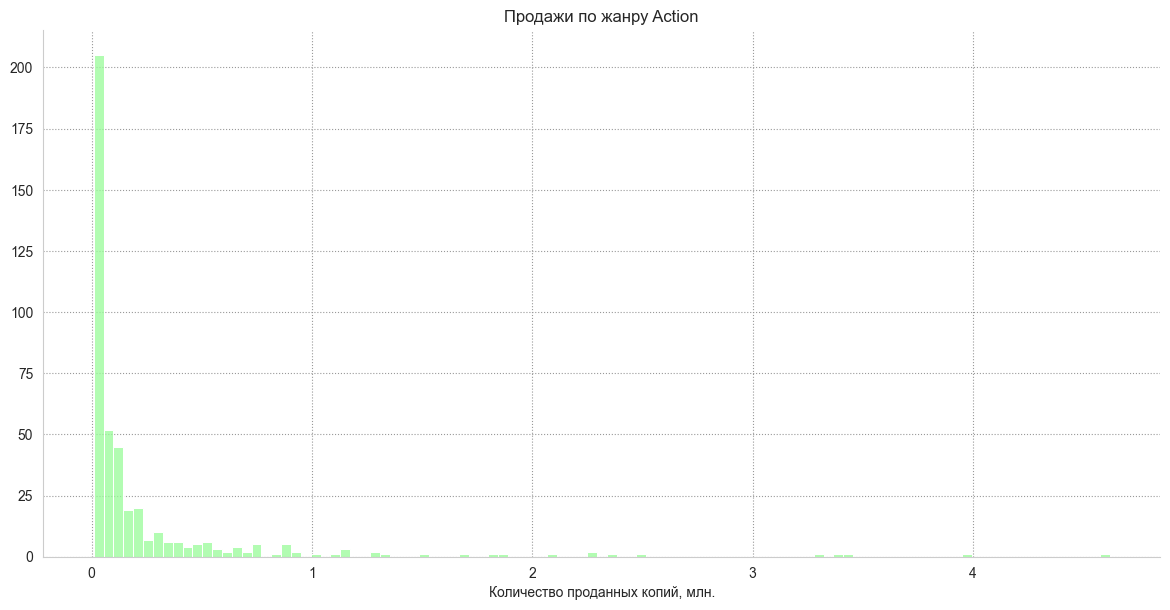

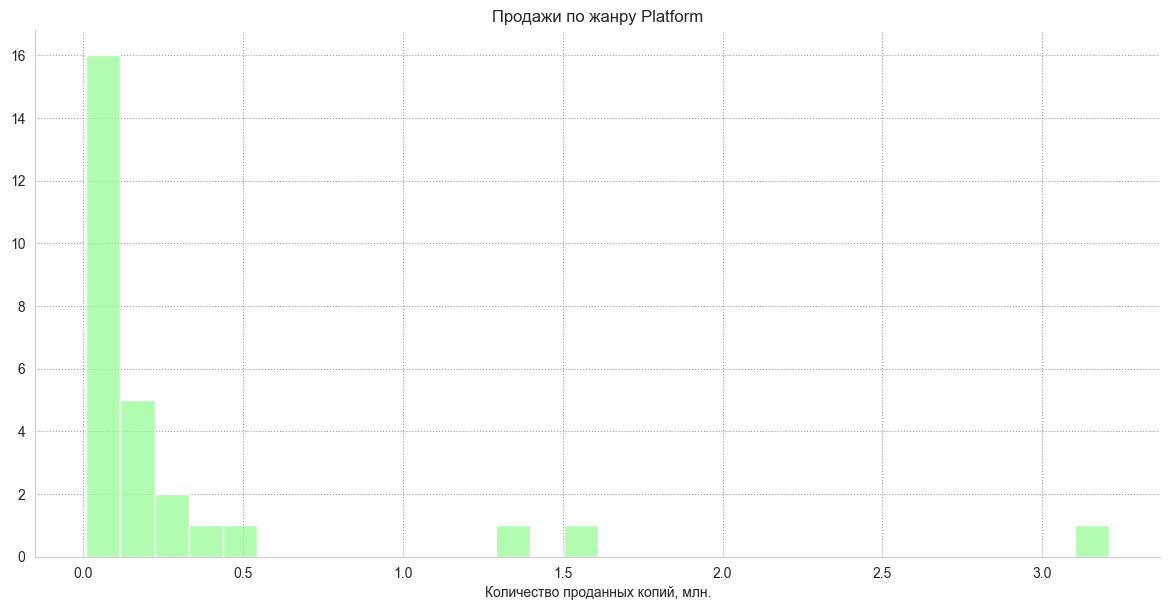

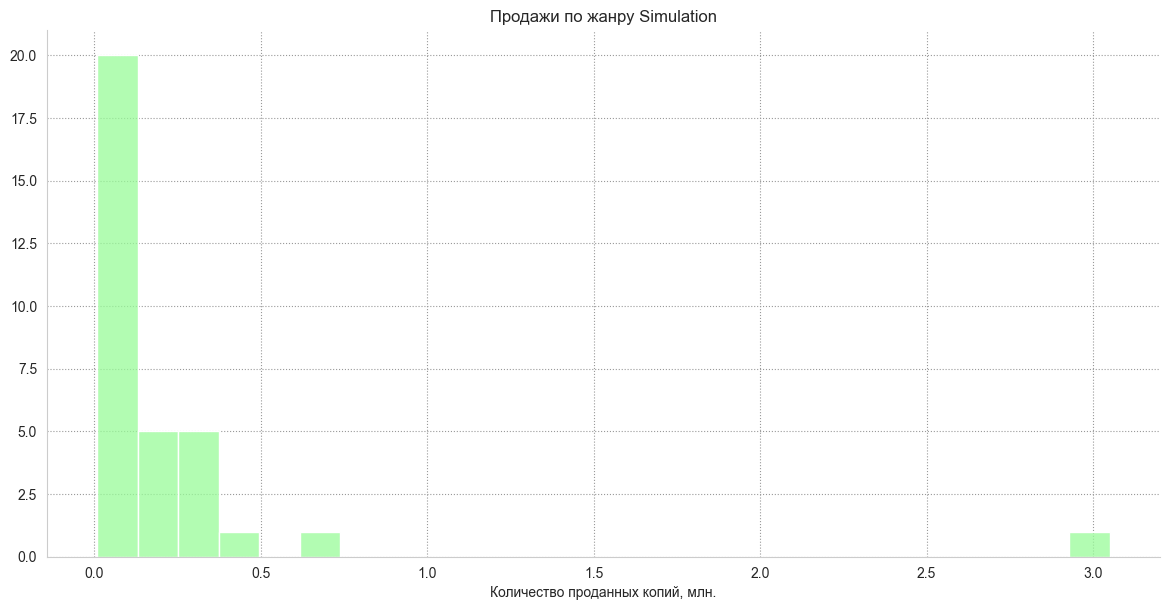

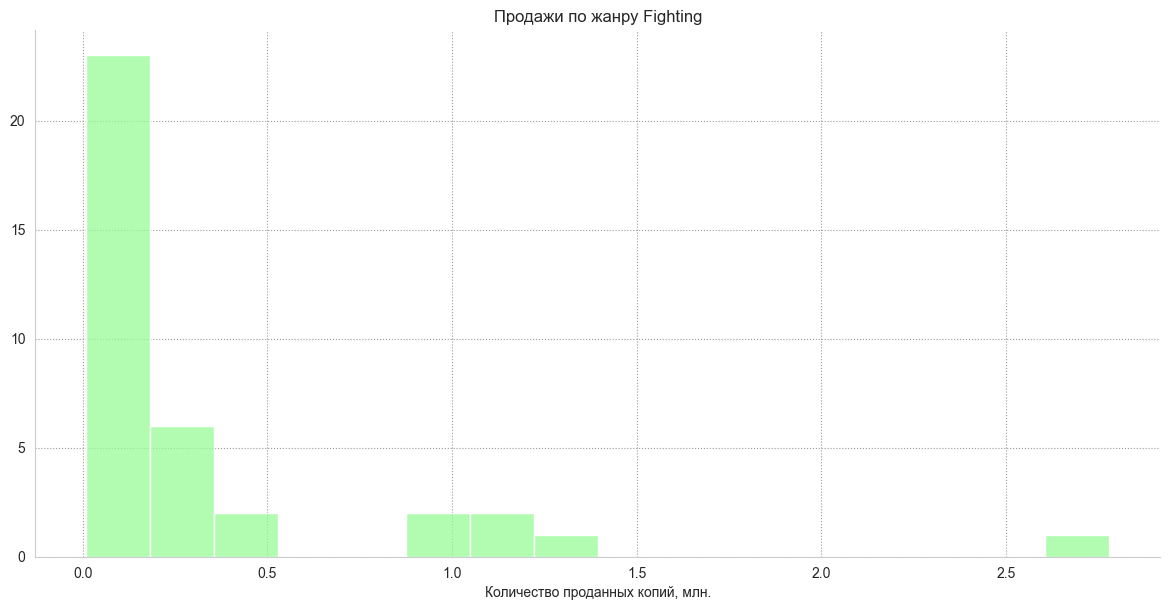

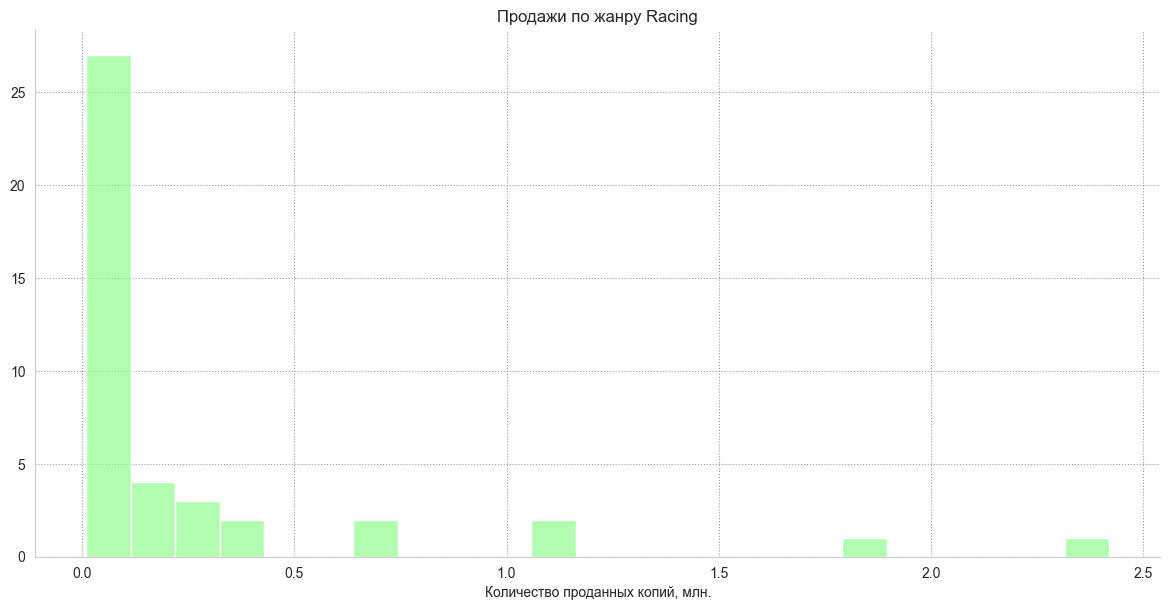

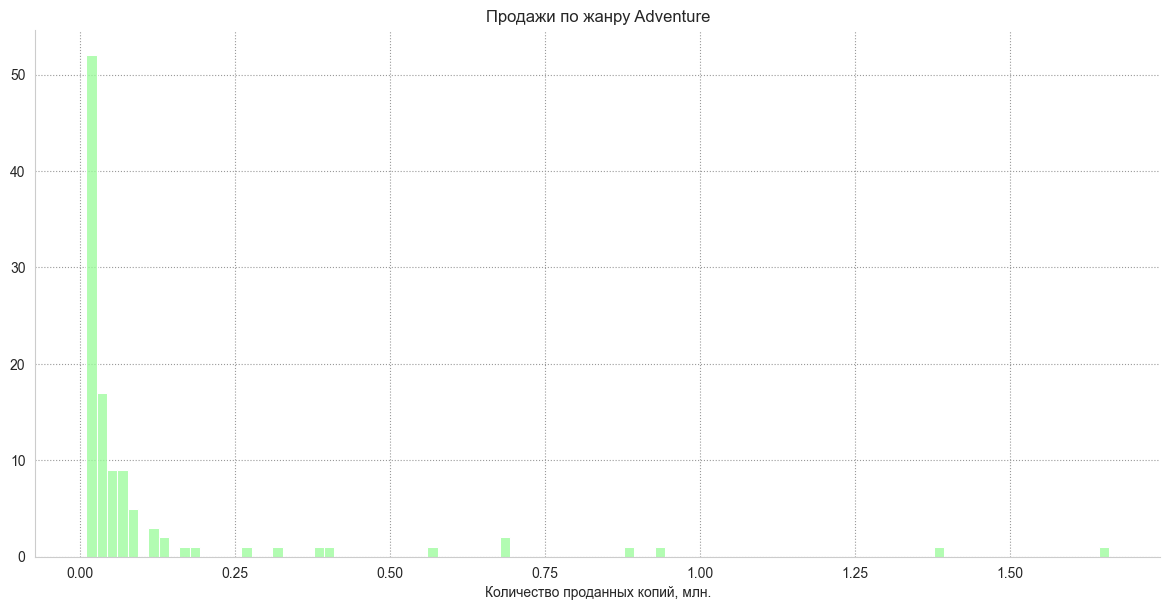

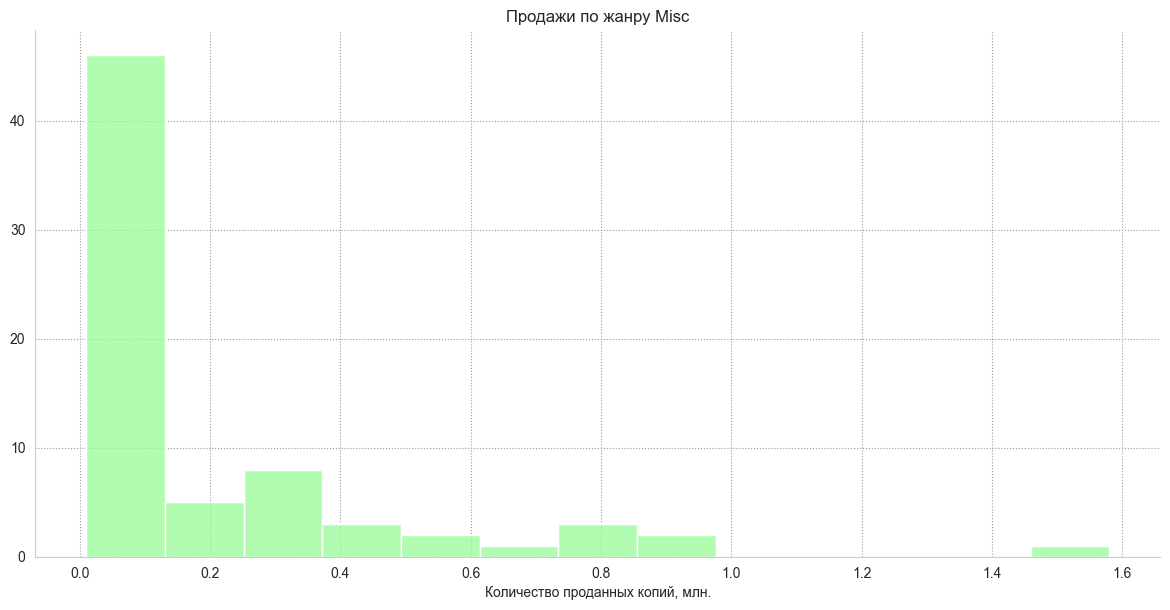

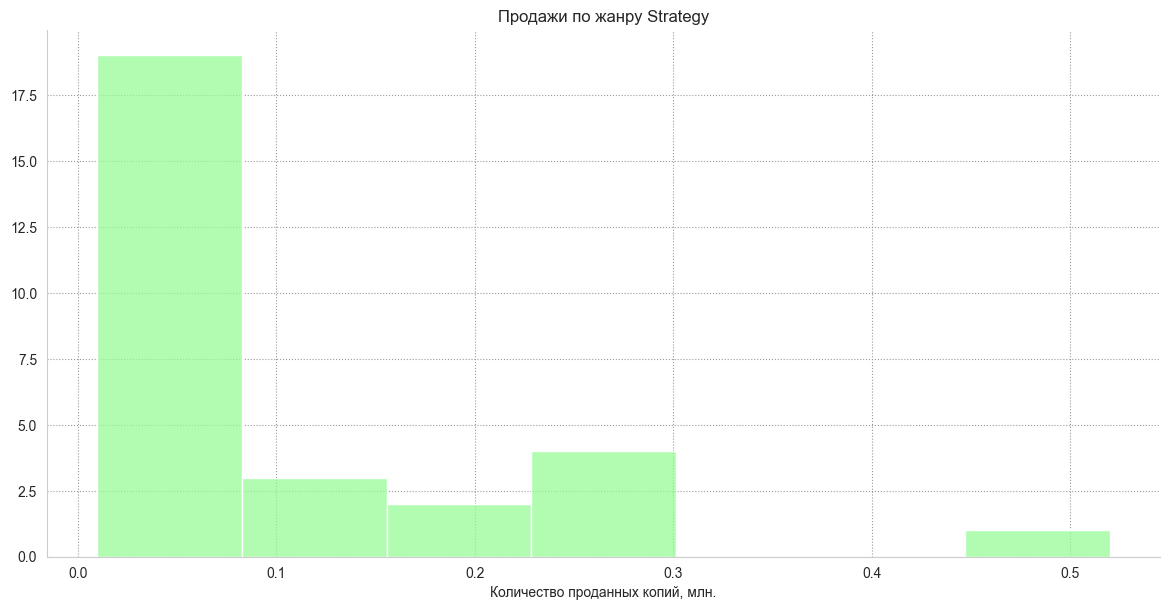

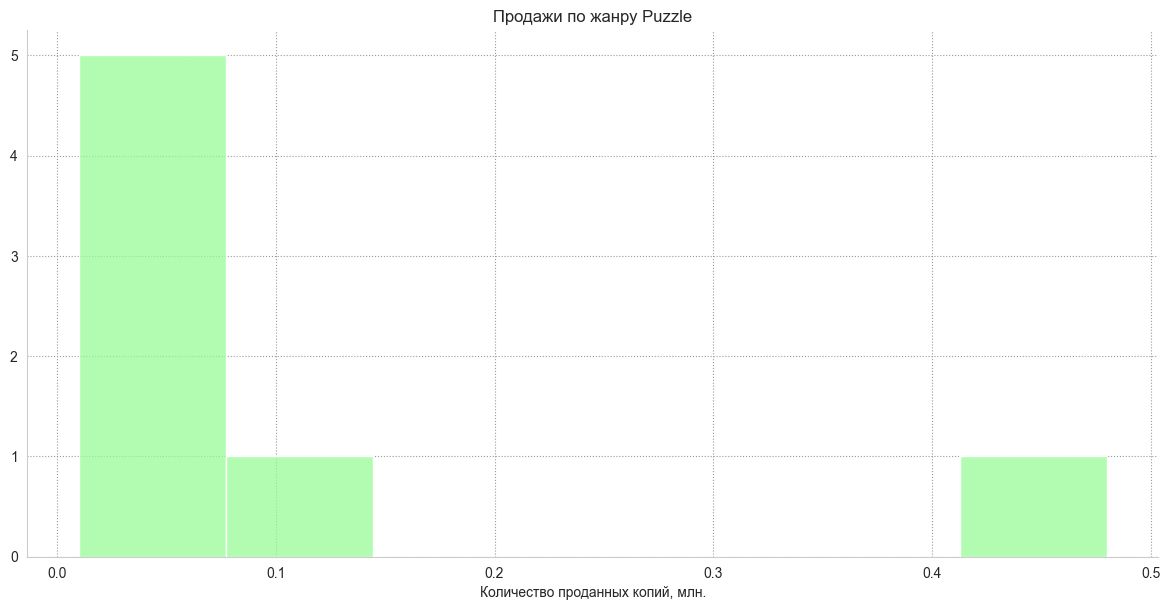

In [53]:
for genre in df['genre'].unique():
    ax1 = sns.displot(data=df.query(f'genre == "{genre}"') , x='total_sales', color='palegreen', height=6, aspect=2)
    ax1.set(title=f'Продажи по жанру {genre}', xlabel='Количество проданных копий, млн.', ylabel='')

**Промежуточный вывод:** жанры раличаются по продажам, однако не различаются по распределению: большинство игр любого жанра продаются небольшими объёмами около 100 тыс.копий. Различия только в количестве игр по самим жанрам, например, игр в жанре Action выпускается значительно больше, чем в жанре Strategy. Среди самых популярных жанров, например, Shooter и Action, примечательное различие заключается в том, что, хотя шутеров и выпускается меньше, в среднем они продаются б*о*льшим количеством копий.

**Вывод по шагу 3:**
1. До 1995 года игры выпускались в малых объёмах, вероятно, из-за сложности в разработке и низкой вычислительной мощности систем того времени. С тех пор вплоть до 2009 года мир игроделов испытал бум - к концу периода выпускалось свыше 1400 игр в год, хотя в начале 90-х выпускалось менее 25. Несмотря на кол-во игр, я пришёл к выоду, что способности вычислительной техники даже за 5 лет существенно меняются, поэтому данные за период до 2007 года счёл неактуальными.
2. Взглянув на график продаж по платформам, убедился в скоротечности популярности различных консолей. Если в 2009 платформа Wii была на пике своей популярности, то уже в 2015 году продажи по ней уже невозможно различить по графику. Если анализировать данные с 2009 года, то можно было бы ложно предположить, будто продажи игр для консолей старого поколения имеют место быть, однако популярны они были в начале периода и неактуальны к 2016 году. Было принято решение анализировать данные 2014-2016 года.
3. За промежуток 2014-2016 года так толком и не появилась платформа, которая по популярности способна потягаться с платформами 2007-2009 годов. Создаётся впечатление, что к 2016 году рынок падает, продажи по всем платформам падают. Возможно, это затишье перед бурей и в 2017 году следует ждать интересные релизы или новые платформы. Так или иначе, почти все платформы поддерживают обратную совместимость, поэтому, несмотря на то, что продажи по ним падают, возможные платформы новых поколений будут поддерживать игры старых поколений, следовательно, от того списка платформ, что у нас появился в результате анализа, вполне можно использовать как актуальные для планирования продаж на 2017, а именно: PS4, XOne, 3DS, WiiU, PC, PSV. PSV с натяжкой.
4. Во время первой попытки построить boxplot по глобальным продажам игр по платформам по 2014-2016 годам, выяснилось, что продажи 14 года по определённым платформам необъективно передают их актуальные продажи ближе к 17 году. Таким образом, учитывая 14 год можно было бы подумать, что медианные продажи PS3 составляют около 250 тыс.копий, а без учёта 14 года - около 30 тыс.копий. Таким образом, было принято решение в дальнейшем анализе учитывать только данные за 2015 и 2016 год. Тем не менее, данный анализ помог прийти к выводу, что у X360 всё ещё достаточно неплохие продажи и добавить её в список потенциально прибыльных платформ.
5. Присутствует небольшая корреляция по платформам PS4, XOne и PC между продажами и оценкой критиков на уровне 0.4. Возможно, сказывается небольшое количество данных. Однако, судя по графикам распределения, можно сделать вывод, что игры с высокими оценками критиков чаще продаются аномально большим количеством копий, но буквально нет примеров, когда игры с низкими оценками критиков продавались хорошо. Поэтому желательно, чтобы игры критикам скорее понравились.
6. У жанров Strategy и Puzzle есть своя небольшая ниша, игры данных жанров сложно назвать массовым продуктом. Самый популярный жанр - Shooter. У него самые высокие аномальные показатели, и даже самые непопулярные игры продаются в количестве до 500 тыс.копий.

<a id='part4'></a>
## Часть 4. Составление портрета пользователей для каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

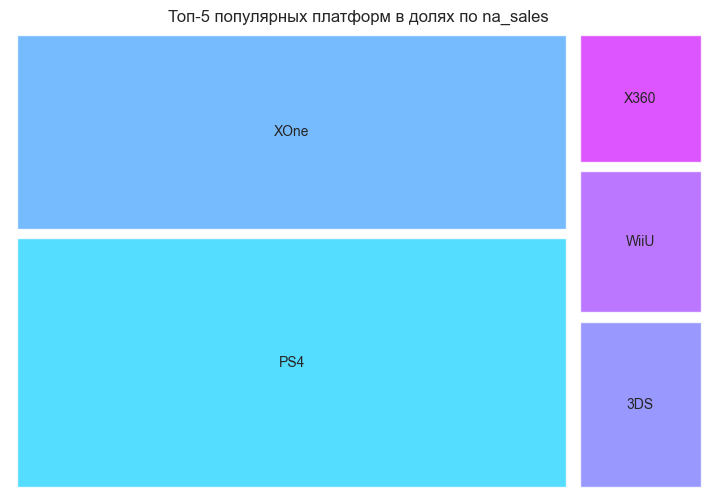

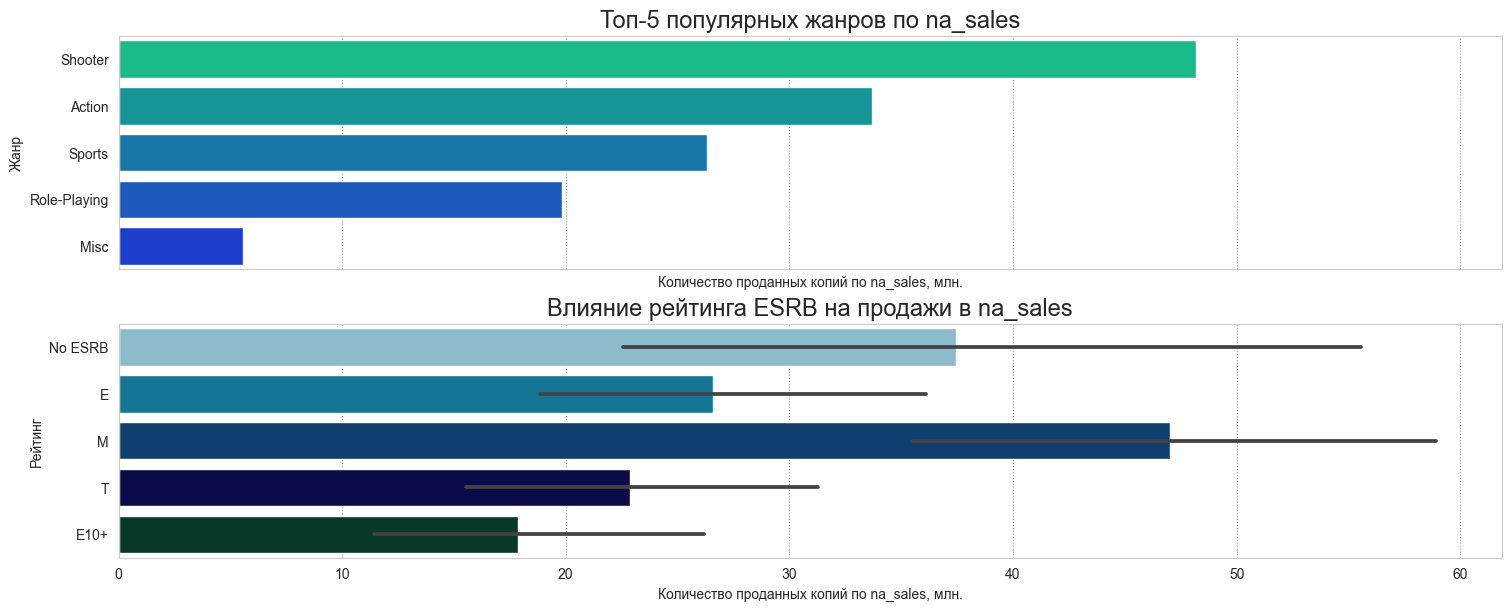

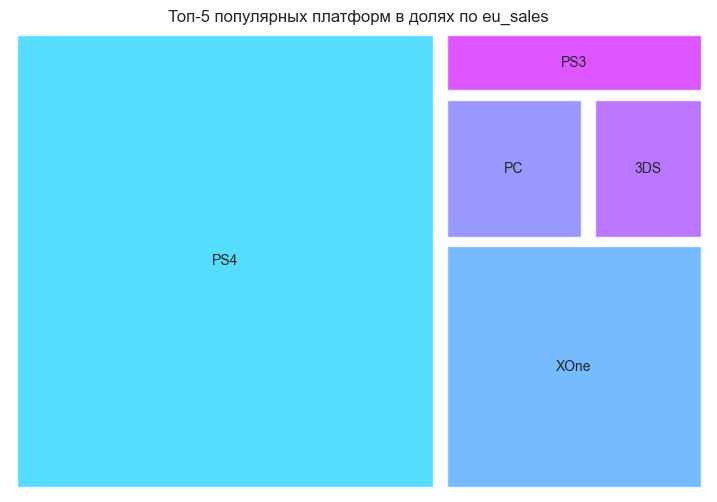

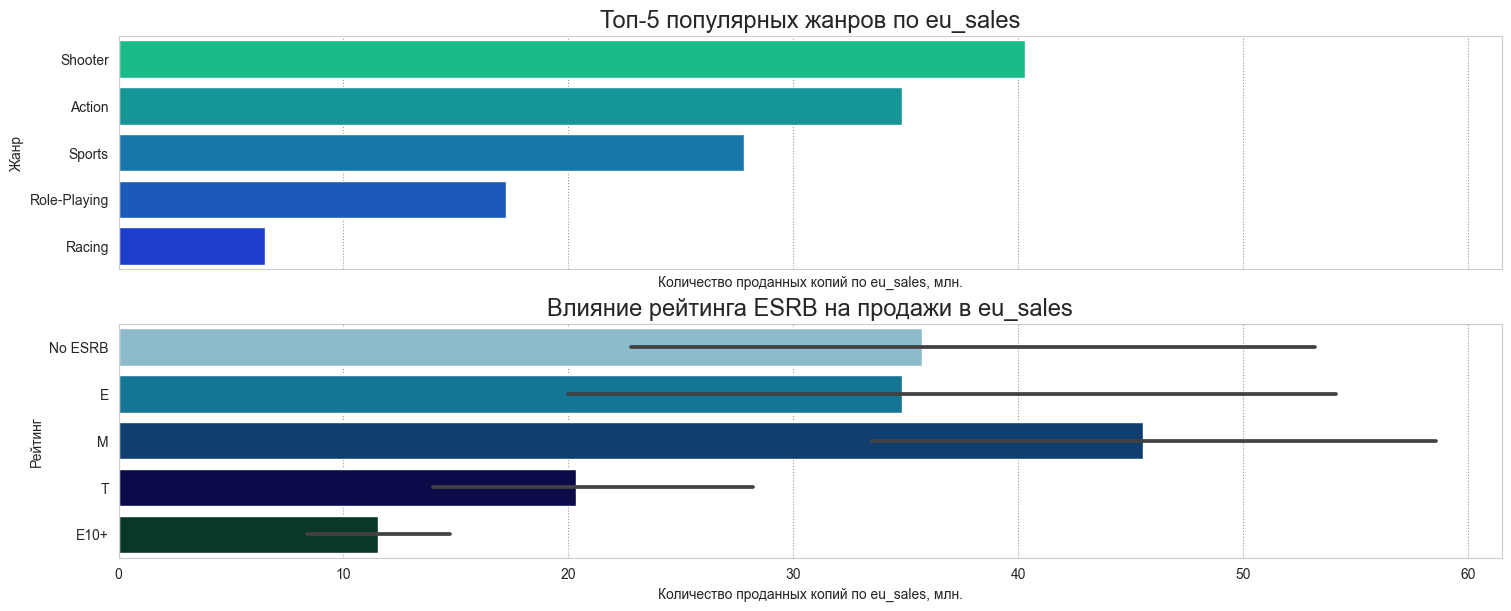

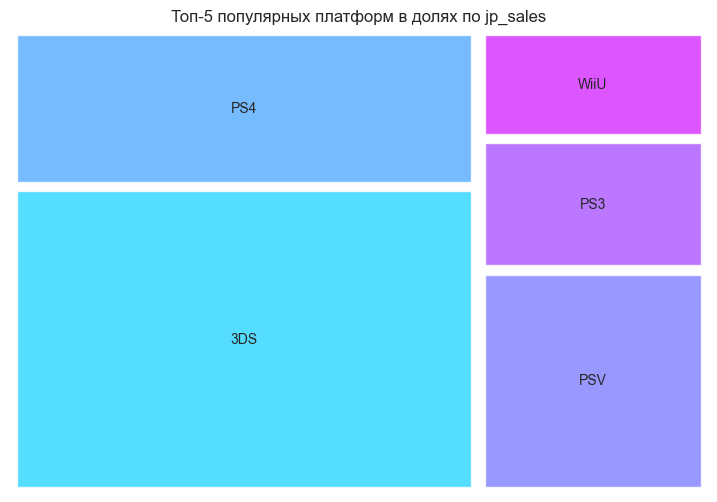

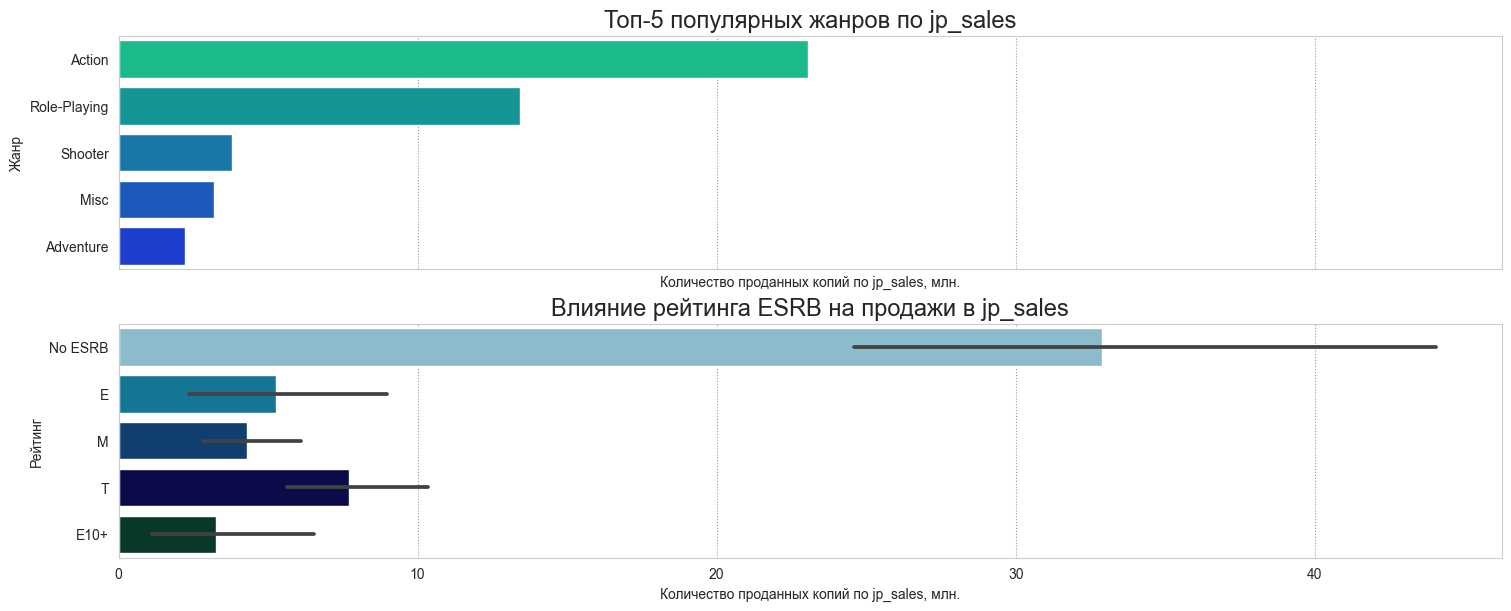

In [54]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    top5_platform = df.groupby('platform')[region].sum().sort_values(ascending=False).reset_index().head(5)
    top5_genre = df.groupby('genre')[region].sum().sort_values(ascending=False).reset_index().head(5)
    df['rating'] = df['rating'].fillna('No ESRB')
    
    ax1 = fig.add_subplot(1, 1, 1)
    
    ax1 = squarify.plot(sizes=top5_platform[region], label=top5_platform['platform'], \
                        alpha=.8, pad=.1, color=sns.color_palette('cool', len(top5_platform['platform'])))
    ax1.figure.set_size_inches(9, 6)
    ax1.set_title(f'Топ-5 популярных платформ в долях по {region}')
    plt.axis('off')
    
    fig, (ax2, ax3) = plt.subplots(nrows=2, ncols=1, figsize=(15, 6), sharex=True, constrained_layout=True)
    
    ax2 = sns.barplot(data=top5_genre, x=region, y='genre', palette='winter_r', ax=ax2, orient='h')
    ax2.set_title(f'Топ-5 популярных жанров по {region}', fontsize=17)
    ax2.set_xlabel(f'Количество проданных копий по {region}, млн.')
    ax2.set_ylabel('Жанр')
    
    ax3 = sns.barplot(data=df, y='rating', \
                      x=region, estimator=sum, palette='ocean_r', ax=ax3, orient='h')
    ax3.set_title(f'Влияние рейтинга ESRB на продажи в {region}', fontsize=17)
    ax3.set_xlabel(f'Количество проданных копий по {region}, млн.')
    ax3.set_ylabel('Рейтинг')
    
    plt.show()

**Портрет пользователя региона NA:**
- в топ-3 входят платформы, которые требуют ТВ, значит, люди играют из дома. WiiU и 3DS - портативные. Самая большая доля и конкурентов: PlayStation и XBox.
- самый популярный жанр - Shooter. Субъективно, это не очень сочетается с приставками типа PS4 и Xbox One/Xbox 360, потому что на PC в такой жанр играть гораздо эффективнее и легче. Второй по популярности жанр, Action, кажется логичным, он не требует большой сноровки для игры на джойстике, кроме того, множество популярных тайтлов выпускаются именно в жанре Action.
- больше всего копий продано по рейтингу M (17+). В совокупности игр с установленным ESRB рейтингом продаются в б*о*льшем количестве, чем игры без рейтинга, поэтому влияние есть.

**Портрет пользователя региона EU:**
- самая популярная платформа с относительно большим отрывом - PS4. Возможно, это объясняется тем, что Sony больше концентрировалась на европейском рынке, чем на рынке США. В пользу этой гипотезы служит то, что в топ популярных платформ европейского рынка всё ещё входит PS3. Кроме того, на европейском рынке с меньшей любовью относятся к портативным консолям, три из них требуют доступ к ТВ, одна платформа - PC, и только на топ-4 находится портативная консоль.
- предпочтения в жанрах среди рынков США и Европы одинаковы за исключением пятого по популярности жанра - в штатах это игры различных жанров, а в Европе - гонки.
- в EU продаётся больше игр с рейтингом E (10+), что можно объяснить тем, что, возможно, Sony больше концентрируется на более младшей аудитории. В совокупности игр с рейтингом также продаётся больше, чем без.

**Портрет пользователя региона JP:**
- рынок Японии - рынок, где больше всего любят портативные консоли, где в топ-5 входят 3 из них: Nintendo 3DS, PSV и WiiU. Кроме того, весь топ занимают консоли, разработанные японскими компаниями, конкурировать на домашнем рынке Microsoft'у тяжело. Объяснить любовь к портативным консолям можно следующим образом: вероятно, японский рынок гораздо меньше любит шутеры и больше любит аркадные игры, для чего портативные консоли подходят больше. Исходя из данного анализа, решение не исключать PSV из списка потенциально прибыльных платформ кажется верным. 
- гипотеза выше подтвердилась - шутеры находятся только на топ-3, а первые два места занимают жанры, больше подходящие для игры на портативных консолях (Action и Role-Playing).
- на японском рынке рейтинг ESRB не влияет на количество продаж. Это выглядит закономерным, судя по тому, насколько японский рынок жанровыми и платформенными предпочтениями отличается от американского и европейского рынков.

<a id='part5'></a>
## Часть 5. Проверка гипотез

Мне известны следующие методы проверки статистических гипотез:
- ttest_1samp(): служит для проверки гипотезы о равенстве среднего генеральной совокупности некоторому значению. В нашем случае на равенство проверяются две выборки, поэтому данный метод нам не подходит.
- ttest_rel(): служит для проверки того, равно ли само себе среднее до проведения изменений над выборкой и после. В нашем случае у нас две разные выборки, а не одна, над которой мы проводим изменения.
- ttest_ind(): служит для проверки равенства среднего двух выборок, что нам подходит.

При проведении статистического теста с помощью ttest_ind() предлагается задать значение для необязательного параметра equal_var, который предполагает, являются ли равными дисперсии выборок. Для первой гипотезы считаю дисперсию не равной по следующим причинам: когда экслюзивы для приставок вроде PS4 или XBox портируются на PC, это может создавать некоторые сложности с оптимизацией, что ухудшает игровой опыт пользователей PC. Кроме того, мощность приставок в средним ниже, чем мощность PC, разработчики могут нарочно занижать графические характеристики игры, чтобы они работали более плавно на приставках, но в результате чего на PC игра будет выглядеть хуже. Всё это может привести к чуть более низким оценкам на PC по сравнению с XOne, следовательно, и различающейся дисперсии.

Что касается второй гипотезы, жанры Action и Sports совсем разные, у них различающийся гемплей, сложность, в Sports выше соревновательный элемент. Поэтому считаю, что их дисперсии будут также различаться.

<a id='part5.1'></a>
### 5.1. Проверка гипотезы "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

```
H_0: Пользовательский рейтинг (rating) платформы Xbox One = пользовательский рейтинг (rating) платформы PC
H_1: Пользовательский рейтинг (rating) платформы Xbox One ≠ пользовательский рейтинг (rating) платформы PC
alpha = 0.05
```

In [55]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(df.query('platform == "XOne"')['user_score'],\
                       df.query('platform == "PC"')['user_score'], equal_var=False, nan_policy='omit')

# alpha = задаём значением уровня значимости
alpha = 0.05

# выводим значения p-value на экран
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, средние пользовательские рейтинги различаются.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги схожи.')

0.2946308619887243
Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги схожи.


**Вывод:**

С почти 30% вероятностью средняя пользовательская оценка по платформе XOne совпадёт с оценкой по платформе PC. Это достаточно большая вероятность, чтобы сказать, что пользовательские оценки по данным платформам схожи.

<a id='part5.2'></a>
### 5.2. Проверка гипотезы "Средние пользовательские рейтинги жанров Action и Sports разные"

```
H_0: Пользовательский рейтинг (rating) жанра Action = пользовательский рейтинг (rating) жанра Sports
H_1: Пользовательский рейтинг (rating) жанра Action ≠ пользовательский рейтинг (rating) жанра Sports
alpha = 0.05
```

In [56]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(df.query('genre == "Action"')['user_score'],\
                       df.query('genre == "Sports"')['user_score'], equal_var=False, nan_policy='omit')

# alpha = задаём значением уровня значимости
alpha = 0.05

# выводим значения p-value на экран
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, средние пользовательские рейтинги различаются.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги схожи.')

5.971616292622824e-10
Отвергаем нулевую гипотезу, средние пользовательские рейтинги различаются.


**Вывод:**

Даже при alpha = 0.01 нулевая гипотеза всё равно была бы отвергнута. Это означает, что менее чем с 1% вероятностью средняя пользовательская оценка по Sports совпадёт со средней пользовательской оценкой по Action, пользователи сильно по-разному оценивают игры в этих жанрах.

<a id='part6'></a>
## Часть 6. Написание общего вывода

**Шаг 1: Изучение общей информации**
- по столбцам с числовыми данными были построены гистограммы и boxplot, с категориальными - посчитано количество и построены столбиковые диаграммы
- пик игровых новинок пришёлся на 2008 и 2009 годы, большинство платформ к этому времени канули в небытие и им на смену пришли новые. В среднем срок жизни платформы - около 9 лет.
- в столбце user_score замечена аббревиатура tbd - to be determined. Таким образом отображаются игры, оценки которым ещё предстоит определить (не набрано достаточное количество оценок для публикации её на сайте, как вариант). Позже выяснилось, что чем ближе к актуальным данные мы рассматриваем, тем меньше игр, помеченных данной аббревиатурой.
- во многих странах, где продаются компьютерные игры, есть своя ассоциация, которая определяет возрастной рейтинг для игры. Следовательно, для одной страны определённая ассоциация, например, ESRB может считаться важной и актуальной (для рынков NA и EU), для других - нет (рынок JP).

**Шаг 2: Подготовка данных**
- применил lower к каждому столбцу
- заменили типы данных везде, где это требовалось
- почти ни один пропуск не был тронут, чтобы не искажать данные

**Шаг 3: EDA**
- выяснили, что данные за период до 2007 года не релевантны ни по объёму продаж, ни по актуальности развития технологий/технического уровня игр. После 2008-2009 года продажи падают по всему рынку. Имею этому следующее объяснение: вероятно, к этому году сформировался пул достаточно успешных компаний, которые на заработанные за предыдущие годы средства могут вкладываться в разработку своего игрового движка и более качественных игр, из-за чего мелким разработчикам становится намного тяжелее конкурировать. Происходит перераспределение затрат при разработке, разросшиеся компании вкладывают больше денег в разработку небольшого количества игр, преимущество в виде более современного игрового движка, что сказывается в том числе на качестве графики, становится конкурентным преимуществом на фоне низкобюджетных игр и, таким образом, выталкивает мелких разработчиков с рынка.
- посмотрели на суммарные продажи по платформам. Выяснилось, что средний срок жизни платформы - около 9 лет (на примере Wii). Из-за того, что уже к 2014 году нет платформ, которые есть ближе к 2017 году, годы до 2014 стали считать неактуальными.
- рассмотрели продажи по платформам за 2014-2016 годы. По результатам анализа по платформам сформировали список потенциально прибыльных платформ, в которые вошли *PS4, XOne, 3DS, WiiU, PC, PSV*, они же лидируют по продажам, хотя продажи по всем платформам за выбранный промежуток времени стабильно падают.
- рассмотрели глобальные продажи игр по платформам. Выяснилось, что продажи за 14 год негативно влияют на актуальность данных, показывают, будто продажи по платформам PS3 и PS4 на одинаковом уровне, что, субъективно, может ввести в заблуждение при планировании рекламного бюджета на 2017 год, поэтому 2014 год выпал из актуальных для дальнейшего анализа. Исходя из глобального анализа по платформам, к списку потенциально прибыльных добавили *X360*. Есть и другие платформы, например, Wii и PS3, которые показывают неплохие глобальные продажи, однако, субъективно, они доживают свой век и без учёта анализа 2015 года их результаты были бы ещё ниже и идут на спад, из-за чего решено не включать их в список потенциально прибыльных. К 2017 году выпуск игр с обратной совместимостью для старых платформ, таких как PS3, скорее всего прекратится.
- была выявлена корреляция между несколькими популярными платформами и оценкой критиков и пользователей. Таким образом, небольшая положительная корреляция на уровне 0.4 наблюдается между платформами PS4, XOne и PC и оценками критиков. В целом, взаимосвязь такова, что высокие оценки критиков идут вместе с высокими продажами игр. Вероятно, мнение критиков важно для игроков и является одним из признаков, по которому игрок решается на покупку.
- взглянули на распределение продаж игр по жанрам. Выяснилось, что распределение у любой игры похоже, отличаются только объёмы продаж. Тиакм образом, большинство игр любого жанра продаются небольшими объёмами, но есть жанры, у которых эти "небольшие объёмы" больше, чем у других: shooter, sports, action.

**Шаг 4: Составление портрета пользователей для каждого региона**

Портрет пользователя региона NA:
 - Любимые платформы: PS4 и XOne;
 - Любимые жанры: Shooter, Action и Sports;
 - Наличие рейтинга ESRB положительно влияет на продажи.
 
Портрет пользователя региона EU:
 - Любимые платформы: PS4 и XOne;
 - Любимые жанры: Shooter, Action и Sports;
 - Наличие рейтинга ESRB положительно влияет на продажи.
 
Портрет пользователя региона JP:
 - Любимые платформы: портативные 3DS, PSV и WiiU, а также обе PS;
 - Любимые жанры: Action и Role-Playing;
 - Наличие рейтинга ESRB не влияет на продажи.
 
**Шаг 5: Проверка гипотез**

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
  - Выбранный метод исследования: ttest_ind(equal_var=False);
  - alpha = 0.05
  - Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги схожи.


2. Средние пользовательские рейтинги жанров Action и Sports разные
  - Выбранный метод исследования: ttest_ind(equal_var=False);
  - alpha = 0.05
  - Отвергаем нулевую гипотезу, средние пользовательские рейтинги различаются.
  
**Рекомендации:**

Изначальная задача заключалась в выявлении закономерностей, определяющих успешность игры, чтобы спланировать рекламную компанию на 2017 год. Для этого я порекомендовал бы обратить внимание на следующие параметры:
1. Платформы, на которых следует сконцентрироваться:
  - Рынок NA: PS4, XOne, 3DS, WiiU, X360
  - Рынок EU: PS4, XOne, PC, 3DS, PS3
  - Рынок JP: 3DS, PS4, PSV, PS3, WiiU
2. Жанры игр, на которых следует сконцентрироваться:
  - Рынок NA: Shooter, Action, Sports, Role-Playing, Misc
  - Рынок EU: Shooter, Action, Sports, Role-Playing, Racing
  - Рынок JP: Action, Role-Playing, Shooter, Misc, Adventure
3. Выбирать для продажи игры, у которых высокие оценки критиков, а также имеющие определённую историческую серию или фанатскую базу, например, по разработчикам:
  - EA Games: FIFA, Battlefield, Dragon Age, Star Wars, Crysis, Need for Speed, The Sims
  - Ubisoft: Assassin's Creed, FarCry, Heros of Might and Magic
  - RockStar Games: Grand Theft Auto, Red Dead Redemption
  - Blizzard: WarCraft, StarCraft, Diablo, World of Warcraft
  - Bethesda Softworks: The Eldre Scrolls, Fallout
  - Capcom: Resident Evil
  - Paradox Interactive: Stellaris, Crusader Kings, Hearts of Iron
4. Получить рейтинг ESRB для NA и EU, не имеет смысла получать для JP
5. Пользовательский рейтинг для одних жанров может сильно отличаться для других, поэтому, если видите шутер с пользовательским рейтингом 60/100 и стратегию с рейтингом 95/100, это ещё не означает, что шутер нужно обойти стороной - в отличие от стратегий, у шутеров намного больше ниша и потенциал для заработка, тогда как большинство стратегий продаются скромными объёмами до 100 тыс.копий.